In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
# !pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.3 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_versio

In [2]:
# !pip uninstall pmdarima -y
# !pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.2 MB/s eta 0:00:00


In [2]:
pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.8 MB/s eta 0:00:00


KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 모델링 및 평가 라이브러리
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.font_manager as fm

# SARIMA 모델링을 위한 라이브러리
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# Find the font path for NanumGothic
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [2]:
# 데이터 불러오기
df_1 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_1.csv')
display(df_1.columns, df_1.shape)

Index(['Unnamed: 0', '판매일', '구분', '매출처코드', '매출처 우편번호', '판매수량', '옵션코드', '규격',
       '입수', '바코드', '상품명', '대분류', '중분류', '소분류', '공급가액', '부가세', 'is_holiday',
       'holiday_name', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season', '1_outlier', '요일',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수'],
      dtype='object')

(32709, 39)

# 7

## SARIMA

In [3]:
# 데이터 삭제
df_1 = df_1[['판매일', '판매수량', 'is_holiday', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season', '요일',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수']]
display(df_1.isnull().value_counts(),
        df_1.head()
)

,,,,,,,,,,,,,,,,,,,,,,,count
판매일,판매수량,is_holiday,is_long_holiday,days_to_holiday,days_from_holiday,is_day_before_holiday,is_day_after_holiday,is_lunar_new_year,is_chuseok,is_independence_day,is_childrens_day,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season,요일,평균기온(℃),최저기온(℃),최고기온(℃),국제유가,소비자물가지수,소비자심리지수,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,32709


,판매일,판매수량,is_holiday,is_long_holiday,days_to_holiday,days_from_holiday,is_day_before_holiday,is_day_after_holiday,is_lunar_new_year,is_chuseok,...,is_national_foundation_day,is_summer_vacation,is_year_end_season,요일,평균기온(℃),최저기온(℃),최고기온(℃),국제유가,소비자물가지수,소비자심리지수
0,2021-01-04,1,0,0,0,3,0,0,0,0,...,0,0,1,0,-2.0,-8.1,3.9,54.65,0.9,95.2
1,2021-01-04,3,0,0,0,3,0,0,0,0,...,0,0,1,0,-2.0,-8.1,3.9,54.65,0.9,95.2
2,2021-01-04,4,0,0,0,3,0,0,0,0,...,0,0,1,0,-2.0,-8.1,3.9,54.65,0.9,95.2
3,2021-01-04,3,0,0,0,3,0,0,0,0,...,0,0,1,0,-2.0,-8.1,3.9,54.65,0.9,95.2
4,2021-01-04,3,0,0,0,3,0,0,0,0,...,0,0,1,0,-2.0,-8.1,3.9,54.65,0.9,95.2


### 일별 집계

In [4]:
# 일별 집계
df_1_agg = df_1.groupby('판매일')['판매수량'].sum().reset_index()
df_1_agg

,판매일,판매수량
0,2021-01-04,85
1,2021-01-05,54
2,2021-01-06,19
3,2021-01-07,28
4,2021-01-08,19
...,...,...
865,2024-06-21,227
866,2024-06-24,167
867,2024-06-25,112
868,2024-06-26,121


In [5]:
df_1_agg['판매일'] = pd.to_datetime(df_1_agg['판매일'])
df_1_agg.set_index('판매일', inplace=True)

df_1_agg.head()

,판매수량
판매일,
2021-01-04,85
2021-01-05,54
2021-01-06,19
2021-01-07,28
2021-01-08,19


### 빠진 이빨 채우기

In [6]:
df_1_agg.reset_index()

,판매일,판매수량
0,2021-01-04,85
1,2021-01-05,54
2,2021-01-06,19
3,2021-01-07,28
4,2021-01-08,19
...,...,...
865,2024-06-21,227
866,2024-06-24,167
867,2024-06-25,112
868,2024-06-26,121


In [7]:
# --- 2. ✨️ 핵심 코드 ✨️ ---

# 단계 1: 데이터의 시작일과 종료일을 기준으로 완벽한 일별 달력(인덱스) 생성
full_date_range = pd.date_range(start=df_1_agg.index.min(), end=df_1_agg.index.max(), freq='D')
print(full_date_range)

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
               '2021-01-12', '2021-01-13',
               ...
               '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21',
               '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25',
               '2024-06-26', '2024-06-27'],
              dtype='datetime64[ns]', length=1271, freq='D')


In [8]:
# 단계 2: .reindex()를 사용해 원본 데이터를 완벽한 달력에 다시 채워넣기
#         - 원본 데이터가 없던 날짜는 '판매수량'이 NaN으로 채워짐
df_resampled = df_1_agg.reindex(full_date_range)
df_resampled.index.name = '판매일'

print("\n--- 1단계 후 (빠진 날짜가 NaN으로 채워짐) ---")
display(df_resampled.head(10))




--- 1단계 후 (빠진 날짜가 NaN으로 채워짐) ---


,판매수량
판매일,
2021-01-04,85.0
2021-01-05,54.0
2021-01-06,19.0
2021-01-07,28.0
2021-01-08,19.0
2021-01-09,NaN
2021-01-10,NaN
2021-01-11,19.0
2021-01-12,28.0


In [9]:
# 단계 3: 이제 이전과 동일한 방식으로 결측치 처리
# 3-1: 주말(토=5, 일=6)의 결측값을 0으로 채우기
is_weekend = df_resampled.index.dayofweek >= 5
df_resampled.loc[is_weekend, '판매수량'] = df_resampled.loc[is_weekend, '판매수량'].fillna(0)

# 3-2: 그래도 남아있는 평일 결측값을 선형 보간법으로 채우기
df_resampled['판매수량'].interpolate(method='linear', inplace=True)


# --- 3. 최종 결과 확인 ---
print("\n--- 최종 처리 후 (모든 날짜가 채워진 데이터) ---")
display(df_resampled.isnull().sum())
df_1_agg = df_resampled.copy()


--- 최종 처리 후 (모든 날짜가 채워진 데이터) ---


/tmp/ipython-input-2088977197.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['판매수량'].interpolate(method='linear', inplace=True)


,0
판매수량,0


In [10]:
# df_1_agg.reset_index()
display(df_1_agg.head())

,판매수량
판매일,
2021-01-04,85.0
2021-01-05,54.0
2021-01-06,19.0
2021-01-07,28.0
2021-01-08,19.0


In [11]:
# 1. 판매일을 datetime 형식으로 변환 - '판매일'은 이미 인덱스이므로 변환 불필요
# df_1_agg = df_1_agg.reset_index() # Reset index to make '판매일' a column
# df_1_agg['판매일'] = pd.to_datetime(df_1_agg['판매일']) # Already datetime index


# 2. 요일 변수 생성 (영문) - 인덱스에서 직접 접근
df_1_agg['요일'] = df_1_agg.index.day_name()
df_1_agg.reset_index(inplace=True)

print(df_1_agg[df_1_agg['판매수량'] == 0].groupby('요일')['판매수량'].count())

요일
Saturday    179
Sunday      181
Name: 판매수량, dtype: int64


In [12]:
df_1_agg.drop(columns='요일',inplace=True)

In [13]:
df_agg = df_1_agg.copy()
df_agg.head()

,판매일,판매수량
0,2021-01-04,85.0
1,2021-01-05,54.0
2,2021-01-06,19.0
3,2021-01-07,28.0
4,2021-01-08,19.0


### SARIMA Modeling

In [79]:
# 2024년 데이터를 테스트 세트로 사용
train_data = df_agg[df_agg['판매일'] < '2024-01-01']['판매수량']
test_data = df_agg[df_agg['판매일'] >= '2024-01-01']['판매수량']

print(f"훈련 데이터 개수: {len(train_data)}개")
print(f"테스트 데이터 개수: {len(test_data)}개")

훈련 데이터 개수: 1092개
테스트 데이터 개수: 179개


In [81]:
print("--- auto_arima로 최적의 파라미터 탐색 시작 ---")

# auto_arima 실행
# m=7: 계절성 주기를 7일(주간)로 설정
auto_model = pm.auto_arima(
    train_data,
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    m=7, # 주간 계절성
    start_P=0, start_Q=0,
    max_P=3, max_Q=3,
    seasonal=True,
    d=1, D=1, # 차분은 일반적으로 1로 시작
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True # 더 빠른 탐색을 위해 True로 설정
)

print("\n--- 탐색 완료 ---")
print(auto_model.summary())

--- auto_arima로 최적의 파라미터 탐색 시작 ---
Performing stepwise search to minimize aic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,0)[7]             : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=12246.183, Time=0.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[7]             : AIC=11692.283, Time=0.53 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[7]             : AIC=11143.608, Time=4.23 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,0)[7]             : AIC=inf, Time=0.54 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,1)[7]             : AIC=11142.993, Time=2.32 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,0)[7]             : AIC=inf, Time=2.47 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,1)[7]             : AIC=inf, Time=3.17 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=8.09 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,2)[7]             : AIC=11143.293, Time=2.33 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[7]             : AIC=inf, Time=1.29 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,2)[7]             : AIC=inf, Time=10.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[7]             : AIC=11743.329, Time=1.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,1)[7]             : AIC=11141.201, Time=4.31 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[7]             : AIC=11142.582, Time=2.70 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,0)[7]             : AIC=inf, Time=5.54 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,1)[7]             : AIC=inf, Time=9.19 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=11.59 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,2)[7]             : AIC=11141.589, Time=4.45 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[7]             : AIC=inf, Time=7.34 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,2)[7]             : AIC=11138.875, Time=11.48 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,2)[7]             : AIC=inf, Time=18.31 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,3)[7]             : AIC=inf, Time=28.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,3)[7]             : AIC=inf, Time=6.84 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,1)[7]             : AIC=inf, Time=15.76 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(3,1,3)[7]             : AIC=inf, Time=25.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,2)[7]             : AIC=inf, Time=9.43 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,2)[7]             : AIC=inf, Time=12.99 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,1,2)[7]             : AIC=inf, Time=10.24 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=8.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,1,2)[7]             : AIC=11144.554, Time=18.14 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,2)[7]             : AIC=inf, Time=13.93 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,1,2)[7]             : AIC=11146.454, Time=19.94 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,2)[7] intercept   : AIC=inf, Time=15.43 sec

Best model:  ARIMA(1,1,1)(2,1,2)[7]          
Total fit time: 297.191 seconds

--- 탐색 완료 ---
                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 1092
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 7)   Log Likelihood               -5562.438
Date:                                Sun, 12 Oct 2025   AIC                          11138.875
Time:                                        15:17:25   BIC                          11173.794
Sample:                                             0   HQIC                         11152.095
                                               - 1092                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----

In [ ]:
SARIMAX(1, 1, 1)x(2, 1, [1, 2], 7)

SARIMAX(1, 1, 1)x(2, 1, [1, 2], 7)

In [83]:
# auto_arima가 찾은 최적 파라미터로 SARIMAX 모델 생성
# (auto_model.order와 auto_model.seasonal_order에 최적값이 저장되어 있음)
model = SARIMAX(
    train_data,
    order=auto_model.order,
    seasonal_order=auto_model.seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# 모델 학습
results = model.fit()

# 테스트 기간만큼 예측 수행
forecast = results.get_forecast(steps=len(test_data))
mean_forecast = forecast.predicted_mean

# 예측 결과와 신뢰구간 확인
confidence_intervals = forecast.conf_int()

# 1. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_data, mean_forecast))

# 2. MAE (Mean Absolute Error)
mae = mean_absolute_error(test_data, mean_forecast)

# 3. R-squared (R²)
r2 = r2_score(test_data, mean_forecast)

# 4. Adjusted R-squared
# SARIMA는 변수 개수(p)가 모델 복잡도에 따라 달라지므로,
# 모델 파라미터 개수를 사용합니다.
n = len(test_data) # 데이터 개수
p = len(results.params) # 모델이 사용한 파라미터(변수)의 개수
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


# --- 결과 출력 ---
print("\n--- SARIMA 모델 최종 검증 성능 ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")


--- SARIMA 모델 최종 검증 성능 ---
RMSE: 75.2058
MAE: 46.8477
R-squared: 0.4394
Adjusted R-squared: 0.4164


좋은 출발!

## Feature Engineering

#### 경제지표

In [14]:
econ = pd.read_csv('/content/drive/MyDrive/유통경진대회/macro_data.csv')
econ.head(-5)

,Unnamed: 0,NAME,VALUE,YEAR,MONTH
0,0,GDP,537.7748,2021,1
1,1,GDP,537.7748,2021,2
2,2,GDP,537.7748,2021,3
3,3,GDP,550.8862,2021,4
4,4,GDP,550.8862,2021,5
...,...,...,...,...,...
1084,1084,평균소비성향,69.0000,2024,3
1085,1085,평균소비성향,69.6000,2024,4
1086,1086,평균소비성향,69.6000,2024,5
1087,1087,평균소비성향,69.6000,2024,6


In [15]:
econ['NAME'].unique()

array(['GDP', '가구당월평균소득', '건설투자', '경기동행지수', '경기선행지수', '경제성장률', '경제심리지수',
       '국제유가', '금값', '기업심리지수', '민간소비', '생산자물가지수', '생활물가지수', '설비투자',
       '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수', '전산업생산지수', '평균소비성향'],
      dtype=object)

In [16]:
econ_list = econ['NAME'].unique()
df_econ = econ.pivot_table(
    index=['YEAR', 'MONTH'],  # 행(row)이 될 기준
    columns='NAME',           # 열(column)이 될 값들
    values='VALUE'            # 셀에 채워질 값
).reset_index()
df_econ.drop(columns = ['GDP', '평균소비성향'])
df_econ[:51]

NAME,YEAR,MONTH,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,국제유가,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
0,2021,1,537.7748,6.127869,1.9,98.1,101.2,1.5,92.9,54.65,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
1,2021,2,537.7748,6.127869,1.9,98.2,101.5,1.5,96.8,61.25,...,0.9,2.1,1.7,9.0,1.4,97.4,-0.3,0.6,103.7,66.5
2,2021,3,537.7748,6.127869,1.9,98.6,101.9,1.5,101.7,64.29,...,0.9,4.1,2.1,9.0,1.9,100.6,9.0,5.9,104.5,66.5
3,2021,4,550.8862,5.833623,-1.1,99.4,102.3,1.4,106.0,63.13,...,3.0,6.0,3.1,2.3,2.5,102.5,15.3,11.1,104.1,70.5
4,2021,5,550.8862,5.833623,-1.1,99.6,102.7,1.4,105.9,66.35,...,3.0,6.6,3.4,2.3,2.6,105.7,14.2,12.6,104.2,70.5
5,2021,6,550.8862,5.833623,-1.1,99.6,103.0,1.4,110.1,71.30,...,3.0,6.6,3.0,2.3,2.3,111.1,14.4,13.0,105.0,70.5
6,2021,7,562.0508,6.398959,-1.8,99.6,102.9,0.0,104.6,72.14,...,0.5,7.4,3.5,-5.2,2.6,103.6,19.5,17.3,105.2,66.8
7,2021,8,562.0508,6.398959,-1.8,99.5,102.7,0.0,105.8,68.73,...,0.5,7.4,3.3,-5.2,2.6,102.9,22.4,18.9,105.1,66.8
8,2021,9,562.0508,6.398959,-1.8,99.6,102.3,0.0,105.3,72.76,...,0.5,7.6,3.1,-5.2,2.4,104.2,26.6,20.4,106.3,66.8
9,2021,10,571.2012,6.169118,0.8,99.7,101.9,1.6,106.6,81.44,...,2.0,9.1,4.6,-0.7,3.2,107.4,36.3,26.1,106.7,66.1


In [17]:
econ_2024 = df_econ[:42]
econ_2025 = df_econ[41:51]
display(econ_2024.tail(), econ_2025.head())

NAME,YEAR,MONTH,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,국제유가,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
37,2024,2,633.5487,7.210210,4.5,100.6,100.5,1.2,93.7,82.81,...,0.5,1.4,3.7,-1.0,3.1,101.9,-0.2,4.1,114.6,69.0
38,2024,3,633.5487,7.210210,4.5,100.4,100.4,1.2,92.5,86.63,...,0.5,1.5,3.8,-1.0,3.1,100.7,-0.5,2.3,112.7,69.0
39,2024,4,638.1754,6.832134,-3.3,100.3,100.6,-0.2,94.8,90.87,...,0.0,1.9,3.6,0.0,2.9,100.7,2.9,6.5,114.1,69.6
40,2024,5,638.1754,6.832134,-3.3,100.0,100.7,-0.2,94.1,84.67,...,0.0,2.3,3.1,0.0,2.7,98.4,4.7,7.6,113.3,69.6
41,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,84.11,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6


NAME,YEAR,MONTH,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,국제유가,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
41,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,84.11,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
42,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,85.20,...,0.4,2.6,3.0,5.4,2.6,103.7,9.9,13.0,112.4,67.9
43,2024,8,635.0868,7.256446,-3.6,99.4,100.7,0.1,94.5,80.09,...,0.4,1.6,2.1,5.4,2.0,100.8,1.8,5.5,113.5,67.9
44,2024,9,635.0868,7.256446,-3.6,99.5,100.7,0.1,94.0,73.76,...,0.4,1.0,1.5,5.4,1.6,100.0,-3.7,1.0,113.2,67.9
45,2024,10,650.0465,6.969401,-4.1,99.7,100.7,0.1,92.8,76.07,...,0.2,1.0,1.2,0.8,1.3,101.8,-2.5,1.7,113.8,68.1


In [18]:
df_agg.head()

,판매일,판매수량
0,2021-01-04,85.0
1,2021-01-05,54.0
2,2021-01-06,19.0
3,2021-01-07,28.0
4,2021-01-08,19.0


In [19]:
df_agg = df_agg.reset_index() # Reset the index to make '판매일' a column again
df_agg.set_index('판매일', inplace=True) # 인덱스로 설정

df_agg['Year'] = df_agg.index.year
df_agg['Month'] = df_agg.index.month
df_agg.head()

,index,판매수량,Year,Month
판매일,,,,
2021-01-04,0,85.0,2021,1
2021-01-05,1,54.0,2021,1
2021-01-06,2,19.0,2021,1
2021-01-07,3,28.0,2021,1
2021-01-08,4,19.0,2021,1


In [20]:
df_agg = df_agg.reset_index() # Reset the index to make '판매일' a column again
df_1_econ = df_agg.merge(econ_2024, left_on=['Year', 'Month'], right_on=['YEAR', 'MONTH'], how='left')
df_1_econ.head(-5)

,판매일,index,판매수량,Year,Month,YEAR,MONTH,GDP,가구당월평균소득,건설투자,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
0,2021-01-04,0,85.0,2021,1,2021,1,537.7748,6.127869,1.9,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
1,2021-01-05,1,54.0,2021,1,2021,1,537.7748,6.127869,1.9,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
2,2021-01-06,2,19.0,2021,1,2021,1,537.7748,6.127869,1.9,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
3,2021-01-07,3,28.0,2021,1,2021,1,537.7748,6.127869,1.9,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
4,2021-01-08,4,19.0,2021,1,2021,1,537.7748,6.127869,1.9,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,2024-06-18,1261,126.0,2024,6,2024,6,638.1754,6.832134,-3.3,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
1262,2024-06-19,1262,90.0,2024,6,2024,6,638.1754,6.832134,-3.3,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
1263,2024-06-20,1263,66.0,2024,6,2024,6,638.1754,6.832134,-3.3,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
1264,2024-06-21,1264,227.0,2024,6,2024,6,638.1754,6.832134,-3.3,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6


In [21]:
df_1_econ.drop(columns = ['YEAR','MONTH'], inplace=True)

In [22]:
df_1_econ.head()

,판매일,index,판매수량,Year,Month,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
0,2021-01-04,0,85.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
1,2021-01-05,1,54.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
2,2021-01-06,2,19.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
3,2021-01-07,3,28.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5
4,2021-01-08,4,19.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0.9,0.9,0.8,9.0,0.9,95.2,-5.8,-1.9,101.6,66.5


#### 공휴일

In [23]:
!pip install holidayskr

In [24]:
from holidayskr import is_holiday, year_holidays


def create_holiday_features(df, date_column=None):
    """
    holidayskr 라이브러리를 사용한 공휴일 Feature Engineering

    Parameters:
    -----------
    df : DataFrame
        원본 데이터프레임
    date_column : str, optional
        날짜 컬럼명 (None이면 자동 감지)

    Returns:
    --------
    DataFrame : 공휴일 feature가 추가된 데이터프레임
    """

    df = df.copy()

    # 날짜 컬럼 자동 감지
    if date_column is None:
        date_candidates = ['판매일', '날짜', 'date', 'Date', '일자', '판매날짜']
        for col in date_candidates:
            if col in df.columns:
                date_column = col
                break

        if date_column is None:
            for col in df.columns:
                if df[col].dtype == 'object' or 'date' in str(df[col].dtype).lower():
                    try:
                        pd.to_datetime(df[col].head())
                        date_column = col
                        break
                    except:
                        continue

    if date_column is None:
        raise ValueError("날짜 컬럼을 찾을 수 없습니다. date_column 파라미터를 명시해주세요.")

    print("\n" + "="*60)
    print("holidayskr를 사용한 공휴일 Feature 생성")
    print("="*60)
    print(f"[사용할 날짜 컬럼] {date_column}")

    df[date_column] = pd.to_datetime(df[date_column])

    # 날짜 범위 확인
    min_date = df[date_column].min()
    max_date = df[date_column].max()
    print(f"데이터 기간: {min_date.date()} ~ {max_date.date()}")

    # holidayskr로 전체 공휴일 정보 가져오기
    # 필요한 연도 목록 생성
    years = list(range(min_date.year, max_date.year + 1))

    print(f"\n공휴일 정보 수집 중... (연도: {years})")

    # 연도별 공휴일 수집
    all_holidays = {}
    for year in years:
        year_hols = year_holidays(str(year))
        for holiday_date, holiday_name in year_hols:
            all_holidays[holiday_date] = holiday_name

    # 공휴일 DataFrame 생성
    holiday_df = pd.DataFrame([
        {'date': date, 'holiday_name': name}
        for date, name in all_holidays.items()
    ])

    if len(holiday_df) > 0:
        holiday_df['date'] = pd.to_datetime(holiday_df['date'])
        holiday_df['is_holiday'] = 1
        print(f"\n총 {len(holiday_df)}개의 공휴일 발견")
        print("\n[공휴일 목록 샘플 (최근 15개)]")
        print(holiday_df.sort_values('date').tail(15).to_string(index=False))
    else:
        holiday_df = pd.DataFrame(columns=['date', 'is_holiday', 'holiday_name'])
        print("\n공휴일 정보를 찾을 수 없습니다.")

    # 원본 데이터에 날짜만 추출한 컬럼 생성 (merge용)
    df['date_only'] = df[date_column].dt.date
    holiday_df['date_only'] = holiday_df['date'].dt.date

    # 1. 기본 공휴일 여부 및 이름 merge
    df = df.merge(
        holiday_df[['date_only', 'is_holiday', 'holiday_name']],
        on='date_only',
        how='left'
    )
    df['is_holiday'] = df['is_holiday'].fillna(0).astype(int)
    df['holiday_name'] = df['holiday_name'].fillna('')

    # 공휴일 날짜 set 생성 (빠른 조회를 위해)
    holiday_dates_set = set(holiday_df['date_only'].tolist())

    # 2. 연휴 구간 판단 (전날 또는 다음날이 공휴일)
    def check_long_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        prev_date = date_obj - timedelta(days=1)
        next_date = date_obj + timedelta(days=1)

        if date_obj in holiday_dates_set:
            if prev_date in holiday_dates_set or next_date in holiday_dates_set:
                return 1
        return 0

    df['is_long_holiday'] = df[date_column].apply(check_long_holiday)

    # 3. 공휴일까지 남은 일수 (향후 7일 이내)
    def days_to_next_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        for i in range(1, 8):  # 7일 이내
            future_date = date_obj + timedelta(days=i)
            if future_date in holiday_dates_set:
                return i
        return 0

    df['days_to_holiday'] = df[date_column].apply(days_to_next_holiday)

    # 4. 공휴일 이후 경과 일수 (과거 7일 이내)
    def days_from_past_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        for i in range(1, 8):  # 7일 이내
            past_date = date_obj - timedelta(days=i)
            if past_date in holiday_dates_set:
                return i
        return 0

    df['days_from_holiday'] = df[date_column].apply(days_from_past_holiday)

    # 5. 공휴일 전날 (장보기 수요 증가)
    df['is_day_before_holiday'] = (df['days_to_holiday'] == 1).astype(int)

    # 6. 공휴일 다음날
    df['is_day_after_holiday'] = (df['days_from_holiday'] == 1).astype(int)

    # 7. 주요 공휴일 개별 인코딩
    df['is_lunar_new_year'] = df['holiday_name'].str.contains(
        '설날|구정', case=False, na=False, regex=True
    ).astype(int)

    df['is_chuseok'] = df['holiday_name'].str.contains(
        '추석', case=False, na=False
    ).astype(int)

    df['is_independence_day'] = df['holiday_name'].str.contains(
        '광복절|삼일절|개천절|한글날', case=False, na=False, regex=True
    ).astype(int)

    df['is_childrens_day'] = df['holiday_name'].str.contains(
        '어린이날', case=False, na=False
    ).astype(int)

    df['is_memorial_day'] = df['holiday_name'].str.contains(
        '현충일', case=False, na=False
    ).astype(int)

    df['is_national_foundation_day'] = df['holiday_name'].str.contains(
        '개천절', case=False, na=False
    ).astype(int)

    # 8. 여름 휴가 시즌 (7-8월, 공휴일 아니지만 계절 효과)
    df['is_summer_vacation'] = (
        df[date_column].dt.month.isin([7, 8])
    ).astype(int)

    # 9. 연말연시 시즌 (12월 말 ~ 1월 초)
    df['is_year_end_season'] = (
        ((df[date_column].dt.month == 12) & (df[date_column].dt.day >= 20)) |
        ((df[date_column].dt.month == 1) & (df[date_column].dt.day <= 7))
    ).astype(int)

    # date_only 컬럼 제거 (임시 컬럼)
    df = df.drop('date_only', axis=1)

    print("\n[생성된 공휴일 Feature 목록]")
    holiday_features = [
        'is_holiday', 'holiday_name', 'is_long_holiday',
        'days_to_holiday', 'days_from_holiday',
        'is_day_before_holiday', 'is_day_after_holiday',
        'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
        'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
        'is_summer_vacation', 'is_year_end_season'
    ]

    for i, feat in enumerate(holiday_features, 1):
        if feat in df.columns:
            print(f"  {i:2d}. {feat}")

    # 공휴일 통계
    print(f"\n[공휴일 통계]")
    print(f"총 공휴일 일수: {df['is_holiday'].sum()}")
    print(f"공휴일 전날: {df['is_day_before_holiday'].sum()}")
    print(f"연휴 기간: {df['is_long_holiday'].sum()}")
    print(f"설날 연휴: {df['is_lunar_new_year'].sum()}")
    print(f"추석 연휴: {df['is_chuseok'].sum()}")

    return df



In [25]:
df_with_holidays = create_holiday_features(df_1_econ)


holidayskr를 사용한 공휴일 Feature 생성
[사용할 날짜 컬럼] 판매일
데이터 기간: 2021-01-04 ~ 2024-06-27

공휴일 정보 수집 중... (연도: [2021, 2022, 2023, 2024])

총 67개의 공휴일 발견

[공휴일 목록 샘플 (최근 15개)]
      date  holiday_name  is_holiday
2024-02-12    대체 공휴일(설날)           1
2024-03-01          3·1절           1
2024-04-10 제22대 국회의원 선거일           1
2024-05-01        근로자의 날           1
2024-05-05          어린이날           1
2024-05-06  대체 공휴일(어린이날)           1
2024-05-15         석가탄신일           1
2024-06-06           현충일           1
2024-08-15           광복절           1
2024-09-16         추석 전날           1
2024-09-17            추석           1
2024-09-18        추석 다음날           1
2024-10-03           개천절           1
2024-10-09           한글날           1
2024-12-25         크리스마스           1

[생성된 공휴일 Feature 목록]
   1. is_holiday
   2. holiday_name
   3. is_long_holiday
   4. days_to_holiday
   5. days_from_holiday
   6. is_day_before_holiday
   7. is_day_after_holiday
   8. is_lunar_new_year
   9. is_chuseok
  10. is_independence_

In [26]:
df_with_holidays.columns

Index(['판매일', 'index', '판매수량', 'Year', 'Month', 'GDP', '가구당월평균소득', '건설투자',
       '경기동행지수', '경기선행지수', '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비',
       '생산자물가지수', '생활물가지수', '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수',
       '전산업생산지수', '평균소비성향', 'is_holiday', 'holiday_name', 'is_long_holiday',
       'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday',
       'is_day_after_holiday', 'is_lunar_new_year', 'is_chuseok',
       'is_independence_day', 'is_childrens_day', 'is_memorial_day',
       'is_national_foundation_day', 'is_summer_vacation',
       'is_year_end_season'],
      dtype='object')

In [27]:
df_with_holidays.drop(columns = 'holiday_name', inplace = True)

#### 주말 여부

In [28]:
# ============================================
# 3. 달력 Features
# ============================================
# 주말 여부
df_with_holidays['day_of_week'] = df_with_holidays['판매일'].dt.dayofweek
df_with_holidays['day_of_month'] = df_with_holidays['판매일'].dt.day
df_with_holidays['is_weekend'] = (df_with_holidays['day_of_week'] >= 5).astype(int)

# 월초/월말
df_with_holidays['is_month_start'] = (df_with_holidays['day_of_month'] <= 3).astype(int)
df_with_holidays['is_month_end'] = (df_with_holidays['day_of_month'] >= 28).astype(int)

# 해당 월의 주말 개수 (미리 계산)
weekend_count = df_with_holidays.groupby(['Year', 'Month', 'is_weekend']).size().unstack(fill_value=0)
if 1 in weekend_count.columns:
    weekend_count = weekend_count[1].reset_index()
    weekend_count.columns = ['Year', 'Month', 'weekend_count_in_month']
    df_with_holidays = df_with_holidays.merge(weekend_count, on=['Year', 'Month'], how='left')
else:
    df_with_holidays['weekend_count_in_month'] = 0

In [29]:

df_with_holidays.columns

Index(['판매일', 'index', '판매수량', 'Year', 'Month', 'GDP', '가구당월평균소득', '건설투자',
       '경기동행지수', '경기선행지수', '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비',
       '생산자물가지수', '생활물가지수', '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수',
       '전산업생산지수', '평균소비성향', 'is_holiday', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season', 'day_of_week',
       'day_of_month', 'is_weekend', 'is_month_start', 'is_month_end',
       'weekend_count_in_month'],
      dtype='object')

In [30]:
df_final = df_with_holidays.copy()

#### 요일 원핫

In [31]:
# 요일 원핫인코딩 (0=월요일 ~ 6=일요일)
dow_dummies = pd.get_dummies(df_with_holidays['day_of_week'], prefix='dow', dtype=int)
df_final = pd.concat([df_with_holidays, dow_dummies], axis=1)

In [32]:
# 요일 분포 확인
print(df_final['day_of_week'].value_counts().sort_index())
# 0(월) ~ 6(일) 중 뭐가 있는지

# # 2021-2024년 데이터면 일요일이 수백 개는 있어야 정상

# 일요일만 필터링
sundays = df_final[df_final['day_of_week'] == 6]
print(f"일요일 데이터: {len(sundays)}개")

day_of_week
0    182
1    182
2    182
3    182
4    181
5    181
6    181
Name: count, dtype: int64
일요일 데이터: 181개


In [33]:
cols = df_final.columns
for c in cols:
  display(df_final[c].head())

,판매일
0,2021-01-04
1,2021-01-05
2,2021-01-06
3,2021-01-07
4,2021-01-08


,index
0,0
1,1
2,2
3,3
4,4


,판매수량
0,85.0
1,54.0
2,19.0
3,28.0
4,19.0


,Year
0,2021
1,2021
2,2021
3,2021
4,2021


,Month
0,1
1,1
2,1
3,1
4,1


,GDP
0,537.7748
1,537.7748
2,537.7748
3,537.7748
4,537.7748


,가구당월평균소득
0,6.127869
1,6.127869
2,6.127869
3,6.127869
4,6.127869


,건설투자
0,1.9
1,1.9
2,1.9
3,1.9
4,1.9


,경기동행지수
0,98.1
1,98.1
2,98.1
3,98.1
4,98.1


,경기선행지수
0,101.2
1,101.2
2,101.2
3,101.2
4,101.2


,경제성장률
0,1.5
1,1.5
2,1.5
3,1.5
4,1.5


,경제심리지수
0,92.9
1,92.9
2,92.9
3,92.9
4,92.9


,국제유가
0,54.65
1,54.65
2,54.65
3,54.65
4,54.65


,금값
0,1866.99
1,1866.99
2,1866.99
3,1866.99
4,1866.99


,기업심리지수
0,96.1
1,96.1
2,96.1
3,96.1
4,96.1


,민간소비
0,0.9
1,0.9
2,0.9
3,0.9
4,0.9


,생산자물가지수
0,0.9
1,0.9
2,0.9
3,0.9
4,0.9


,생활물가지수
0,0.8
1,0.8
2,0.8
3,0.8
4,0.8


,설비투자
0,9.0
1,9.0
2,9.0
3,9.0
4,9.0


,소비자물가지수
0,0.9
1,0.9
2,0.9
3,0.9
4,0.9


,소비자심리지수
0,95.2
1,95.2
2,95.2
3,95.2
4,95.2


,수입물가지수
0,-5.8
1,-5.8
2,-5.8
3,-5.8
4,-5.8


,수출물가지수
0,-1.9
1,-1.9
2,-1.9
3,-1.9
4,-1.9


,전산업생산지수
0,101.6
1,101.6
2,101.6
3,101.6
4,101.6


,평균소비성향
0,66.5
1,66.5
2,66.5
3,66.5
4,66.5


,is_holiday
0,0
1,0
2,0
3,0
4,0


,is_long_holiday
0,0
1,0
2,0
3,0
4,0


,days_to_holiday
0,0
1,0
2,0
3,0
4,0


,days_from_holiday
0,3
1,4
2,5
3,6
4,7


,is_day_before_holiday
0,0
1,0
2,0
3,0
4,0


,is_day_after_holiday
0,0
1,0
2,0
3,0
4,0


,is_lunar_new_year
0,0
1,0
2,0
3,0
4,0


,is_chuseok
0,0
1,0
2,0
3,0
4,0


,is_independence_day
0,0
1,0
2,0
3,0
4,0


,is_childrens_day
0,0
1,0
2,0
3,0
4,0


,is_memorial_day
0,0
1,0
2,0
3,0
4,0


,is_national_foundation_day
0,0
1,0
2,0
3,0
4,0


,is_summer_vacation
0,0
1,0
2,0
3,0
4,0


,is_year_end_season
0,1
1,1
2,1
3,1
4,0


,day_of_week
0,0
1,1
2,2
3,3
4,4


,day_of_month
0,4
1,5
2,6
3,7
4,8


,is_weekend
0,0
1,0
2,0
3,0
4,0


,is_month_start
0,0
1,0
2,0
3,0
4,0


,is_month_end
0,0
1,0
2,0
3,0
4,0


,weekend_count_in_month
0,8
1,8
2,8
3,8
4,8


,dow_0
0,1
1,0
2,0
3,0
4,0


,dow_1
0,0
1,1
2,0
3,0
4,0


,dow_2
0,0
1,0
2,1
3,0
4,0


,dow_3
0,0
1,0
2,0
3,1
4,0


,dow_4
0,0
1,0
2,0
3,0
4,1


,dow_5
0,0
1,0
2,0
3,0
4,0


,dow_6
0,0
1,0
2,0
3,0
4,0


In [34]:
for c in cols:
  display(df_final[c].value_counts())

,count
판매일,
2021-01-04,1
2023-04-29,1
2023-05-06,1
2023-05-05,1
2023-05-04,1
...,...
2022-03-03,1
2022-03-02,1
2022-03-01,1


,count
index,
0,1
845,1
852,1
851,1
850,1
...,...
423,1
422,1
421,1


,count
판매수량,
0.0,360
96.0,13
80.0,12
62.0,11
102.0,11
...,...
233.0,1
72.5,1
163.0,1


,count
Year,
2022,365
2023,365
2021,362
2024,179


,count
Month,
3,124
5,124
1,121
4,120
6,117
2,113
7,93
8,93
10,93


,count
GDP,
562.0508,92
571.2012,92
581.8844,92
582.5255,92
605.4223,92
617.0935,92
550.8862,91
582.6723,91
596.8832,91


,count
가구당월평균소득,
6.398959,92
6.169118,92
6.459270,92
6.401718,92
6.918541,92
6.676058,92
5.833623,91
6.212520,91
6.553032,91


,count
건설투자,
0.8,184
-1.8,92
0.2,92
1.5,92
-3.9,92
-1.1,91
-0.6,91
-0.5,91
4.5,91


,count
경기동행지수,
100.6,153
100.7,122
99.6,122
100.0,92
100.5,92
100.9,92
101.2,90
101.0,61
101.6,61


,count
경기선행지수,
100.7,92
101.2,89
101.5,89
101.9,62
100.4,62
102.7,62
99.8,61
100.3,61
102.3,60


,count
경제성장률,
0.5,184
0.4,180
0.0,92
1.6,92
-0.4,92
0.8,92
1.4,91
0.9,91
0.7,91


,count
경제심리지수,
91.8,89
94.8,61
105.3,61
106.6,61
91.9,61
98.5,31
99.9,31
92.4,31
94.7,31


,count
국제유가,
91.21,31
107.59,31
77.57,31
88.79,31
86.12,31
80.65,31
74.79,31
78.27,31
86.63,31


,count
금값,
1666.63,31
1947.83,31
2034.70,31
1913.98,31
1919.30,31
1950.27,31
1989.83,31
1913.65,31
2162.35,31


,count
기업심리지수,
89.8,93
110.5,62
96.1,59
91.9,31
95.4,31
97.1,31
98.6,31
105.1,31
102.7,31


,count
민간소비,
0.5,183
3.0,182
0.0,179
2.0,92
1.3,92
-0.1,92
0.1,92
0.3,92
-1.2,90


,count
생산자물가지수,
7.4,62
9.0,62
1.3,61
6.6,61
-0.3,61
0.6,61
0.9,59
5.1,31
5.8,31


,count
생활물가지수,
4.6,93
3.1,91
3.7,90
4.3,90
3.4,62
3.3,62
5.8,61
7.8,31
6.7,31


,count
설비투자,
-5.2,92
-0.7,92
5.1,92
-0.5,92
-3.6,92
2.2,92
2.3,91
1.6,91
0.5,91


,count
소비자물가지수,
3.8,120
2.6,93
5.0,92
3.7,91
2.4,88
3.4,62
3.2,62
4.2,62
2.7,61


,count
소비자심리지수,
104.4,61
100.7,61
103.6,59
90.0,59
88.8,31
85.9,31
101.6,31
99.7,31
98.2,31


,count
수입물가지수,
19.4,31
35.9,31
-3.9,31
-9.9,31
-9.3,31
-13.6,31
-12.2,31
-7.0,31
-0.5,31


,count
수출물가지수,
13.0,61
23.5,61
22.0,61
3.3,31
23.4,31
-13.2,31
-6.4,31
2.3,31
-1.3,31


,count
전산업생산지수,
111.9,92
110.0,62
113.3,62
111.0,61
110.1,61
110.7,61
113.1,58
109.5,31
111.1,31


,count
평균소비성향,
69.6,180
66.8,92
66.1,92
68.6,92
68.0,92
69.2,92
70.5,91
68.7,91
68.4,91


,count
is_holiday,
0,1212
1,59


,count
is_long_holiday,
0,1247
1,24


,count
days_to_holiday,
0,977
1,59
3,43
2,43
4,41
6,37
5,37
7,34


,count
days_from_holiday,
0,972
1,59
3,44
2,43
4,42
5,38
6,38
7,35


,count
is_day_before_holiday,
0,1212
1,59


,count
is_day_after_holiday,
0,1212
1,59


,count
is_lunar_new_year,
0,1258
1,13


,count
is_chuseok,
0,1262
1,9


,count
is_independence_day,
0,1262
1,9


,count
is_childrens_day,
0,1266
1,5


,count
is_memorial_day,
0,1267
1,4


,count
is_national_foundation_day,
0,1268
1,3


,count
is_summer_vacation,
0,1085
1,186


,count
is_year_end_season,
0,1210
1,61


,count
day_of_week,
0,182
1,182
2,182
3,182
4,181
5,181
6,181


,count
day_of_month,
4,42
17,42
27,42
26,42
25,42
24,42
23,42
22,42
21,42


,count
is_weekend,
0,909
1,362


,count
is_month_start,
0,1148
1,123


,count
is_month_end,
0,1131
1,140


,count
weekend_count_in_month,
8,747
10,278
9,246


,count
dow_0,
0,1089
1,182


,count
dow_1,
0,1089
1,182


,count
dow_2,
0,1089
1,182


,count
dow_3,
0,1089
1,182


,count
dow_4,
0,1090
1,181


,count
dow_5,
0,1090
1,181


,count
dow_6,
0,1090
1,181


In [35]:
# 데이터 하나도 없는 거 삭제
# df_final.drop(columns = 'is_independence_day', inplace=True)
df_final.describe	()

,판매일,index,판매수량,Year,Month,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,...,is_month_start,is_month_end,weekend_count_in_month,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
count,1271,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,...,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,2022-10-01 00:00:00,635.000000,75.908340,2022.284028,6.107002,587.619363,6.556188,-0.326987,100.363336,100.812116,...,0.096774,0.110149,8.630999,0.143194,0.143194,0.143194,0.143194,0.142408,0.142408,0.142408
min,2021-01-04 00:00:00,0.000000,0.000000,2021.000000,1.000000,537.774800,5.833623,-3.900000,98.100000,98.900000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-11-17 12:00:00,317.500000,0.000000,2021.000000,3.000000,571.201200,6.212520,-1.800000,99.900000,100.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-10-01 00:00:00,635.000000,67.000000,2022.000000,6.000000,582.525500,6.459270,-0.200000,100.600000,100.700000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023-08-14 12:00:00,952.500000,116.000000,2023.000000,9.000000,605.422300,6.832134,0.800000,100.900000,101.500000,...,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024-06-27 00:00:00,1270.000000,599.000000,2024.000000,12.000000,638.175400,7.288782,4.500000,101.600000,103.000000,...,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,367.050405,73.804632,1.027368,3.425179,27.725909,0.399555,2.161074,0.803080,1.074080,...,0.295766,0.313199,0.819035,0.350409,0.350409,0.350409,0.350409,0.349605,0.349605,0.349605


In [36]:
df_final.sort_values('판매일').head()

,판매일,index,판매수량,Year,Month,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,...,is_month_start,is_month_end,weekend_count_in_month,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,2021-01-04,0,85.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0,0,8,1,0,0,0,0,0,0
1,2021-01-05,1,54.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0,0,8,0,1,0,0,0,0,0
2,2021-01-06,2,19.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0,0,8,0,0,1,0,0,0,0
3,2021-01-07,3,28.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0,0,8,0,0,0,1,0,0,0
4,2021-01-08,4,19.0,2021,1,537.7748,6.127869,1.9,98.1,101.2,...,0,0,8,0,0,0,0,1,0,0


#### 시즈널 변수

In [37]:
# 월(Month)에 대한 주기성 변수
df_final['month_sin'] = np.sin(2 * np.pi * df_final['Month'] / 12)
df_final['month_cos'] = np.cos(2 * np.pi * df_final['Month'] / 12)

# 요일(Day of Week)에 대한 주기성 변수
df_final['day_of_week'] = df_final['판매일'].dt.dayofweek
df_final['dow_sin'] = np.sin(2 * np.pi * df_final['day_of_week'] / 7)
df_final['dow_cos'] = np.cos(2 * np.pi * df_final['day_of_week'] / 7)


In [38]:
df_final.columns

Index(['판매일', 'index', '판매수량', 'Year', 'Month', 'GDP', '가구당월평균소득', '건설투자',
       '경기동행지수', '경기선행지수', '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비',
       '생산자물가지수', '생활물가지수', '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수',
       '전산업생산지수', '평균소비성향', 'is_holiday', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season', 'day_of_week',
       'day_of_month', 'is_weekend', 'is_month_start', 'is_month_end',
       'weekend_count_in_month', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4',
       'dow_5', 'dow_6', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos'],
      dtype='object')

#### 날씨

In [39]:
temp = pd.read_csv('/content/drive/MyDrive/유통경진대회/ta_20251009170604.csv', encoding='cp949')
temp.shape

(1462, 5)

In [40]:
temp['날짜'] = temp['날짜'].replace('\t', '', regex=True) # regex=True 추가하여 \t 패턴 일치
print(temp.head(-5), temp.shape)

              날짜  지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0     2021-01-01  전국     -3.4     -9.3      1.6
1     2021-01-02  전국     -2.8     -6.9      1.4
2     2021-01-03  전국     -3.3     -7.7      1.1
3     2021-01-04  전국     -2.0     -8.1      3.9
4     2021-01-05  전국     -2.2     -7.4      1.9
...          ...  ..      ...      ...      ...
1452  2024-12-23  전국     -0.2     -6.4      6.8
1453  2024-12-24  전국      0.4     -4.3      6.3
1454  2024-12-25  전국      1.8     -3.5      7.1
1455  2024-12-26  전국      2.4     -2.0      6.5
1456  2024-12-27  전국     -0.7     -4.2      3.1

[1457 rows x 5 columns] (1462, 5)


In [41]:
temp.isna().value_counts()

날짜     지점     평균기온(℃)  최저기온(℃)  최고기온(℃)
False  False  False    False    False      1461
       True   True     True     True          1
Name: count, dtype: int64

In [42]:
temp.sort_values('날짜', inplace=True)
temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
1461,,NaN,NaN,NaN,NaN
0,2021-01-01,전국,-3.4,-9.3,1.6
1,2021-01-02,전국,-2.8,-6.9,1.4
2,2021-01-03,전국,-3.3,-7.7,1.1
3,2021-01-04,전국,-2.0,-8.1,3.9
...,...,...,...,...,...
1456,2024-12-27,전국,-0.7,-4.2,3.1
1457,2024-12-28,전국,-1.5,-4.6,1.7
1458,2024-12-29,전국,1.0,-4.0,6.6
1459,2024-12-30,전국,4.8,-0.6,10.0


In [43]:
temp.drop(columns=['지점'], inplace=True)
temp.dropna(inplace=True)
temp

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2021-01-01,-3.4,-9.3,1.6
1,2021-01-02,-2.8,-6.9,1.4
2,2021-01-03,-3.3,-7.7,1.1
3,2021-01-04,-2.0,-8.1,3.9
4,2021-01-05,-2.2,-7.4,1.9
...,...,...,...,...
1456,2024-12-27,-0.7,-4.2,3.1
1457,2024-12-28,-1.5,-4.6,1.7
1458,2024-12-29,1.0,-4.0,6.6
1459,2024-12-30,4.8,-0.6,10.0


In [44]:
# 1. ✨️ 날씨 데이터의 '날짜' 컬럼을 datetime 타입으로 변환 (타입 통일)
temp['날짜'] = pd.to_datetime(temp['날짜'])


# 2. ✨️ pd.merge()를 사용하여 두 데이터프레임을 합칩니다.
#    왼쪽(df_final)은 '판매일'을, 오른쪽(temp)은 '날짜'를 기준으로 합칩니다.
df_temp = pd.merge(
    df_final,
    temp,
    left_on='판매일',
    right_on='날짜',
    how='left'  # 'left'를 기준으로 하여 모든 판매 데이터를 유지
)


# 3. (선택사항) 합친 후에는 '날짜' 컬럼이 중복되므로 하나를 삭제해줍니다.
df_temp.drop('날짜', axis=1, inplace=True)
df_temp.tail()

,판매일,index,판매수량,Year,Month,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,...,dow_4,dow_5,dow_6,month_sin,month_cos,dow_sin,dow_cos,평균기온(℃),최저기온(℃),최고기온(℃)
1266,2024-06-23,1266,0.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,...,0,0,1,1.224647e-16,-1.0,-0.781831,0.623490,23.8,21.5,27.8
1267,2024-06-24,1267,167.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,...,0,0,0,1.224647e-16,-1.0,0.000000,1.000000,24.1,20.3,28.9
1268,2024-06-25,1268,112.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,...,0,0,0,1.224647e-16,-1.0,0.781831,0.623490,22.4,18.0,27.4
1269,2024-06-26,1269,121.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,...,0,0,0,1.224647e-16,-1.0,0.974928,-0.222521,22.8,16.8,29.1
1270,2024-06-27,1270,111.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,...,0,0,0,1.224647e-16,-1.0,0.433884,-0.900969,21.8,17.3,26.5


In [45]:
df_temp.shape

(1271, 59)

In [46]:
df_2024 = df_temp.copy()

In [47]:
df_final = df_temp.copy()

## SARIMAX

### Sarimax Modeling

📊 SARIMAX 모델링 시작

✅ 데이터 준비 완료
   기간: 2021-01-04 00:00:00 ~ 2024-06-27 00:00:00
   데이터 포인트: 1271개
   외부변수: 51개

📋 사용할 외부변수:
   1. GDP
   2. 가구당월평균소득
   3. 건설투자
   4. 경기동행지수
   5. 경기선행지수
   6. 경제성장률
   7. 경제심리지수
   8. 국제유가
   9. 금값
   10. 기업심리지수
   11. 민간소비
   12. 생산자물가지수
   13. 생활물가지수
   14. 설비투자
   15. 소비자물가지수
   16. 소비자심리지수
   17. 수입물가지수
   18. 수출물가지수
   19. 전산업생산지수
   20. 평균소비성향
   21. is_holiday
   22. is_long_holiday
   23. days_to_holiday
   24. days_from_holiday
   25. is_day_before_holiday
   26. is_day_after_holiday
   27. is_lunar_new_year
   28. is_chuseok
   29. is_independence_day
   30. is_childrens_day
   31. is_memorial_day
   32. is_national_foundation_day
   33. is_summer_vacation
   34. is_year_end_season
   35. day_of_week
   36. day_of_month
   37. is_weekend
   38. is_month_start
   39. is_month_end
   40. weekend_count_in_month
   41. dow_0
   42. dow_1
   43. dow_2
   44. dow_3
   45. dow_4
   46. dow_5
   47. dow_6
   48. month_sin
   49. month_cos
   50. dow_si

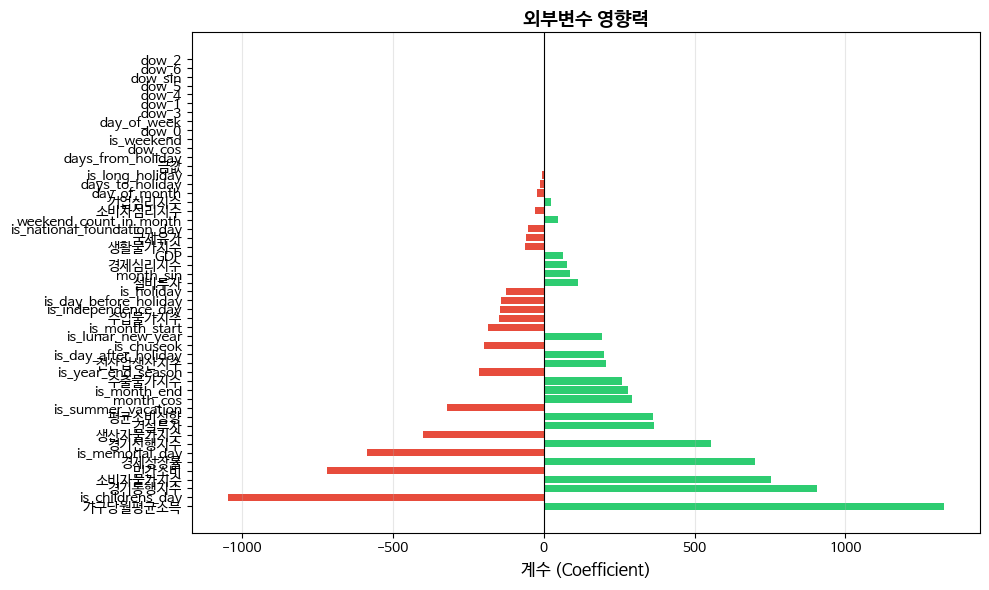


📈 결과 시각화


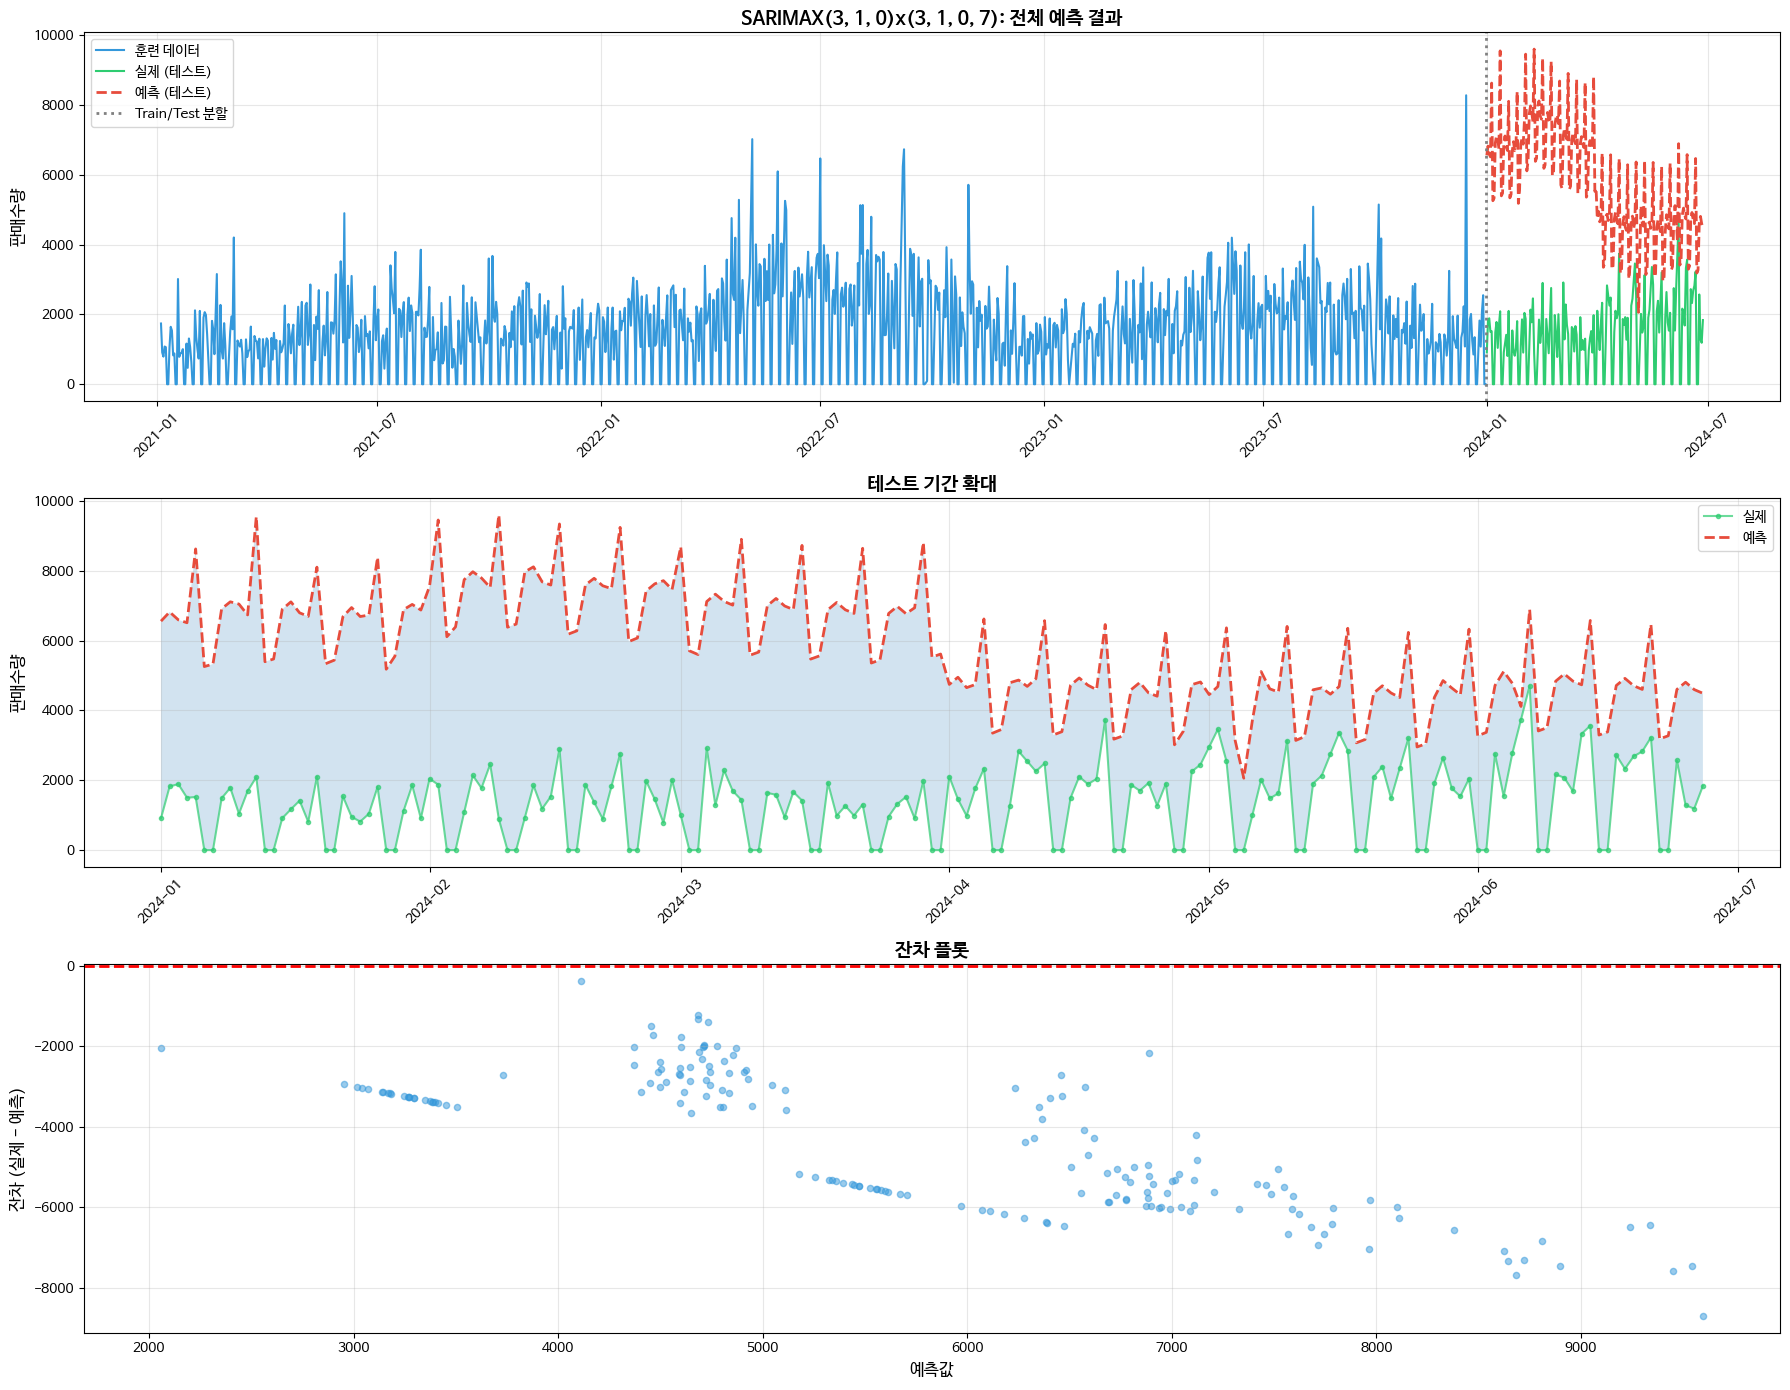


🔬 모델 진단


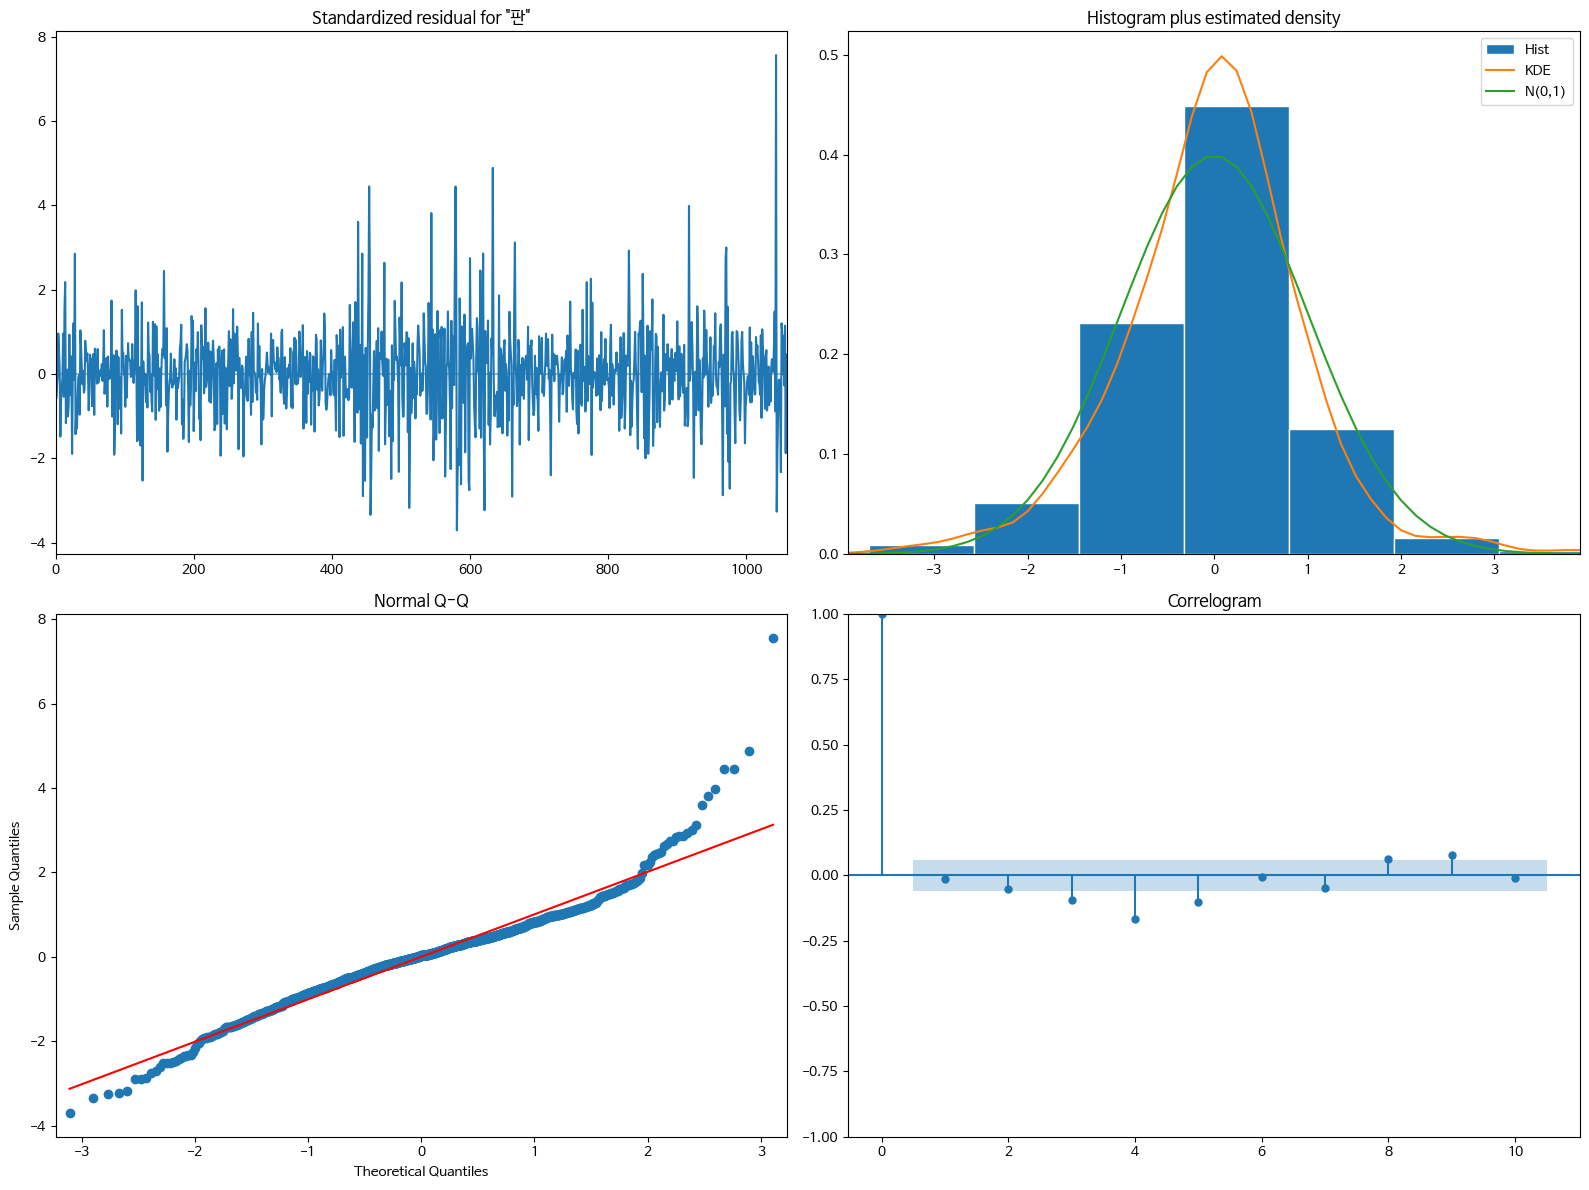

✅ 진단 플롯 완료

🔄 전체 데이터로 최종 모델 학습
✅ 최종 모델 학습 완료
   Order: (3, 1, 0)
   Seasonal Order: (3, 1, 0, 7)
   AIC: 20128.92
   BIC: 20426.00

💾 모델 저장
SARIMAX 최종 모델이 '/content/drive/MyDrive/유통경진대회/A_out_sarimax_model.pkl' 파일로 저장되었습니다.

✅ SARIMAX 모델링 완료!

📌 모델 정보:
   Order: SARIMAX(3, 1, 0)x(3, 1, 0, 7)
   외부변수: 51개
   테스트 RMSE: 4716.65
   테스트 R²: -18.7898

🎯 다음 단계:
   1. 2025년 외부변수 데이터 준비
   2. 2025년 예측 코드 실행

💾 저장된 변수:
   - sarimax_model: 학습된 모델
   - sarimax_order: (3, 1, 0)
   - sarimax_seasonal_order: (3, 1, 0, 7)
   - sarimax_exog_columns: ['GDP', '가구당월평균소득', '건설투자', '경기동행지수', '경기선행지수', '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비', '생산자물가지수', '생활물가지수', '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수', '전산업생산지수', '평균소비성향', 'is_holiday', 'is_long_holiday', 'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday', 'is_lunar_new_year', 'is_chuseok', 'is_independence_day', 'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day', 'is_summer_vacation',

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ========================================
# 1. 데이터 준비
# ========================================
print("="*60)
print("📊 SARIMAX 모델링 시작")
print("="*60)

# 시계열 데이터 준비
df_ts = df_final.copy()
df_ts['판매일'] = pd.to_datetime(df_ts['판매일'])
df_ts = df_ts.sort_values('판매일').reset_index(drop=True)

# 판매수량 (내생변수)
y = df_ts['판매수량']

# 외부변수 (외생변수) 선택
exog_columns = [
    'GDP', '가구당월평균소득', '건설투자', '경기동행지수', '경기선행지수', '경제성장률',
    '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비', '생산자물가지수',
    '생활물가지수', '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수',
    '수출물가지수', '전산업생산지수', '평균소비성향', 'is_holiday', 'is_long_holiday',
    'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
    'is_lunar_new_year', 'is_chuseok', 'is_independence_day', 'is_childrens_day',
    'is_memorial_day', 'is_national_foundation_day', 'is_summer_vacation',
    'is_year_end_season', 'day_of_week', 'day_of_month', 'is_weekend', 'is_month_start',
    'is_month_end', 'weekend_count_in_month', 'dow_0', 'dow_1', 'dow_2', 'dow_3',
    'dow_4', 'dow_5', 'dow_6'
]
seasonal_features = ['month_sin', 'month_cos', 'dow_sin', 'dow_cos']
for col in seasonal_features:
    if col in df_ts.columns:
        exog_columns.append(col)

X = df_ts[exog_columns]

print(f"\n✅ 데이터 준비 완료")

print(f"   기간: {df_ts['판매일'].min()} ~ {df_ts['판매일'].max()}")
print(f"   데이터 포인트: {len(y)}개")
print(f"   외부변수: {len(exog_columns)}개")
print(f"\n📋 사용할 외부변수:")
for i, col in enumerate(exog_columns, 1):
    print(f"   {i}. {col}")


# ========================================
# 2. Train/Test 분리
# ========================================
print("\n" + "="*60)
print("✂️  Train/Test 분리")
print("="*60)

train_mask = df_ts['판매일'] < '2024-01-01'
test_mask = df_ts['판매일'] >= '2024-01-01'

y_train, y_test = y[train_mask], y[test_mask]
X_train, X_test = X[train_mask], X[test_mask]

print(f"✅ 분리 완료")
print(f"   Train: {df_ts.loc[train_mask, '판매일'].min()} ~ {df_ts.loc[train_mask, '판매일'].max()}")
print(f"   Train 크기: {len(y_train)}개")
print(f"   Test: {df_ts.loc[test_mask, '판매일'].min()} ~ {df_ts.loc[test_mask, '판매일'].max()}")
print(f"   Test 크기: {len(y_test)}개")


# ========================================
# 3. SARIMAX 모델 학습 (최적 차수 사용)
# ========================================
print("\n" + "="*60)
print("🤖 SARIMAX 모델 학습")
print("="*60)

# 최적 차수:
order = (3, 1, 1)           # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s)

print(f"\n📌 모델 차수:")
print(f"   Order: {order}")
print(f"   Seasonal Order: {seasonal_order}")
print(f"   외부변수: {len(exog_columns)}개")
print(f"\n🔄 모델 학습 중... (시간이 다소 걸릴 수 있습니다)")

# SARIMAX 모델
model = SARIMAX(
    y_train,
    exog=X_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# 학습
fitted_model = model.fit(disp=False, maxiter=200)

print(f"\n✅ 학습 완료!")
print(f"   AIC: {fitted_model.aic:.2f}")
print(f"   BIC: {fitted_model.bic:.2f}")
print(f"   Log Likelihood: {fitted_model.llf:.2f}")


# ========================================
# 4. 모델 요약
# ========================================
print("\n" + "="*60)
print("📊 모델 요약")
print("="*60)
print(fitted_model.summary())


# ========================================
# 5. 테스트 데이터 예측 및 평가
# ========================================
print("\n" + "="*60)
print("🎯 테스트 데이터 예측")
print("="*60)

# 예측
y_pred_test = fitted_model.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)

# 음수 방지
y_pred_test = np.maximum(y_pred_test, 0)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / (y_test + 1e-5))) * 100
r2 = r2_score(y_test, y_pred_test)

print(f"\n📊 테스트 성능:")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   MAPE: {mape:.2f}%")
print(f"   R²: {r2:.4f}")


# ========================================
# 6. 외부변수 계수 분석
# ========================================

print("\n" + "="*60)
print("📈 외부변수 영향력 분석")
print("="*60)

params = fitted_model.params
# AR, MA, sigma2 관련 파라미터를 제외한 나머지가 외부변수 계수
exog_params = params.drop([p for p in params.index if p.startswith(('ar', 'ma', 'sigma2'))])
exog_params.index = exog_columns # 순서가 동일하므로 컬럼명 직접 매핑

if not exog_params.empty:
    exog_df = pd.DataFrame({'변수': exog_params.index, '계수': exog_params.values}).sort_values('계수', key=abs, ascending=False)

    print("\n외부변수 계수 (절댓값 기준 정렬):")
    print(exog_df.to_string(index=False))

    # 시각화
    plt.figure(figsize=(10, 6))
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in exog_df['계수']]
    plt.barh(exog_df['변수'], exog_df['계수'], color=colors)
    plt.xlabel('계수 (Coefficient)', fontsize=12)
    plt.title('외부변수 영향력', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


# ========================================
# 7. 시각화
# ========================================
print("\n" + "="*60)
print("📈 결과 시각화")
print("="*60)

fig, axes = plt.subplots(3, 1, figsize=(18, 14))

# 7-1. 전체 기간 (Train + Test)
ax1 = axes[0]
train_dates = df_ts.loc[train_mask, '판매일']
test_dates = df_ts.loc[test_mask, '판매일']

ax1.plot(train_dates, y_train, label='훈련 데이터', color='#3498db', linewidth=1.5)
ax1.plot(test_dates, y_test, label='실제 (테스트)', color='#2ecc71', linewidth=1.5)
ax1.plot(test_dates, y_pred_test, label='예측 (테스트)', color='#e74c3c',
         linestyle='--', linewidth=2)
ax1.axvline(x=train_dates.iloc[-1], color='gray', linestyle=':', linewidth=2,
            label='Train/Test 분할')
ax1.set_title(f'SARIMAX{order}x{seasonal_order}: 전체 예측 결과',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('판매수량', fontsize=12)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# 7-2. 테스트 기간 확대
ax2 = axes[1]
ax2.plot(test_dates, y_test, label='실제', color='#2ecc71',
         marker='o', markersize=3, linewidth=1.5, alpha=0.7)
ax2.plot(test_dates, y_pred_test, label='예측', color='#e74c3c',
         linestyle='--', linewidth=2)
ax2.fill_between(test_dates, y_test.values, y_pred_test, alpha=0.2)
ax2.set_title('테스트 기간 확대', fontsize=14, fontweight='bold')
ax2.set_ylabel('판매수량', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# 7-3. 잔차 플롯
ax3 = axes[2]
residuals = y_test.values - y_pred_test
ax3.scatter(y_pred_test, residuals, alpha=0.5, s=20, color='#3498db')
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('예측값', fontsize=12)
ax3.set_ylabel('잔차 (실제 - 예측)', fontsize=12)
ax3.set_title('잔차 플롯', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ========================================
# 8. 진단 플롯
# ========================================
print("\n" + "="*60)
print("🔬 모델 진단")
print("="*60)

fig = fitted_model.plot_diagnostics(figsize=(16, 12))
plt.tight_layout()
plt.show()

print("✅ 진단 플롯 완료")


# ========================================
# 9. 최종 모델 (전체 데이터로 재학습)
# ========================================
print("\n" + "="*60)
print("🔄 전체 데이터로 최종 모델 학습")
print("="*60)

final_model = SARIMAX(y, exog=X, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
final_fitted = final_model.fit(disp=False, maxiter=200)

print("✅ 최종 모델 학습 완료")
print(f"   Order: {order}")
print(f"   Seasonal Order: {seasonal_order}")
print(f"   AIC: {final_fitted.aic:.2f}")
print(f"   BIC: {final_fitted.bic:.2f}")


# ========================================
# 10. 모델 저장
# ========================================

print("\n" + "="*60)
print("💾 모델 저장")
print("="*60)

# 저장할 최종 모델 객체는 'final_fitted' 입니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_sarimax_model.pkl'
final_fitted.save(filename)
print(f"SARIMAX 최종 모델이 '{filename}' 파일로 저장되었습니다.")

sarimax_model = final_fitted
sarimax_order = order
sarimax_seasonal_order = seasonal_order
sarimax_exog_columns = exog_columns

print("\n" + "="*60)
print("✅ SARIMAX 모델링 완료!")
print("="*60)
print(f"\n📌 모델 정보:")
print(f"   Order: SARIMAX{order}x{seasonal_order}")
print(f"   외부변수: {len(exog_columns)}개")
print(f"   테스트 RMSE: {rmse:.2f}")
print(f"   테스트 R²: {r2:.4f}")
print(f"\n🎯 다음 단계:")
print(f"   1. 2025년 외부변수 데이터 준비")
print(f"   2. 2025년 예측 코드 실행")
print(f"\n💾 저장된 변수:")
print(f"   - sarimax_model: 학습된 모델")
print(f"   - sarimax_order: {order}")
print(f"   - sarimax_seasonal_order: {seasonal_order}")
print(f"   - sarimax_exog_columns: {exog_columns}")

결과 개처참
1. 외부변수 대폭 줄이기
2. 데이터 스케일링 => 정규화
3. 단계적 변수 추가해보기...

## SARIMAX V2

### 데이터 선택

In [48]:
df_final.columns

Index(['판매일', 'index', '판매수량', 'Year', 'Month', 'GDP', '가구당월평균소득', '건설투자',
       '경기동행지수', '경기선행지수', '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비',
       '생산자물가지수', '생활물가지수', '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수',
       '전산업생산지수', '평균소비성향', 'is_holiday', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season', 'day_of_week',
       'day_of_month', 'is_weekend', 'is_month_start', 'is_month_end',
       'weekend_count_in_month', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4',
       'dow_5', 'dow_6', 'month_sin', 'month_cos', 'dow_sin', 'dow_cos',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'],
      dtype='object')

In [61]:
df_final.to_csv('/content/drive/MyDrive/유통경진대회/A_out_1_df.csv', index=False)

### Try 1
____순서____
'month_sin',
'month_cos',
'dow_sin',
'dow_cos',
'평균기온(℃)',
'최고기온(℃)',
'is_holiday',
'is_long_holiday',
'is_day_before_holiday',
'is_day_after_holiday',
'is_month_end',
'가구당월평균소득',
'민간소비',
'소비자심리지수',

### Try 2
____순서____
'month_cos', 'is_day_before_holiday', 'month_sin', '민간소비', 'is_day_after_holiday', 'is_long_holiday', 'is_holiday', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6'

In [52]:
df_sl = df_final[['판매일', '판매수량', 'month_cos', 'is_day_before_holiday', 'month_sin', '민간소비', 'is_day_after_holiday', 'is_long_holiday', 'is_holiday', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']] # 필요한 것만 남기기
df_sl.shape

(1271, 16)

### 데이터 스케일링

In [53]:
from sklearn.preprocessing import StandardScaler

# --- 데이터 분리(X_train, X_test)까지는 완료되었다고 가정 ---
# 예시:
X = df_sl.drop(['판매일', '판매수량'], axis=1)
y = df_sl['판매수량']
train_mask = df_sl['판매일'] < '2024-01-01'
test_mask = df_sl['판매일'] >= '2024-01-01'
X_train, X_test = X[train_mask], X[test_mask]


# 1. 스케일링을 적용할 컬럼 목록 정의
cols_to_scale = [
    '가구당월평균소득', '민간소비', '소비자심리지수', '평균기온(℃)', '최고기온(℃)'
]
# 실제 X_train에 존재하는 컬럼만으로 리스트를 다시 만듭니다.
existing_cols_to_scale = [col for col in cols_to_scale if col in X_train.columns]

# 2. StandardScaler 객체 생성
scaler = StandardScaler()

# 3. 훈련 데이터(X_train)로 스케일러를 '학습(fit)'하고 '변환(transform)'을 동시에 수행
#    주의: 원본 데이터프레임을 직접 수정하지 않기 위해 복사본을 만듭니다.
X_train_scaled = X_train.copy()
X_train_scaled[existing_cols_to_scale] = scaler.fit_transform(X_train[existing_cols_to_scale])


# 4. 검증 데이터(X_test)에는 '학습' 없이 '변환(transform)'만 적용
#    훈련 데이터에서 학습한 규칙(평균, 표준편차)을 그대로 사용하여 변환합니다.
X_test_scaled = X_test.copy()
X_test_scaled[existing_cols_to_scale] = scaler.transform(X_test[existing_cols_to_scale])


print("--- 스케일링 적용 후 훈련 데이터 (상위 5개) ---")
display(X_train_scaled.head())

--- 스케일링 적용 후 훈련 데이터 (상위 5개) ---


,month_cos,is_day_before_holiday,month_sin,민간소비,is_day_after_holiday,is_long_holiday,is_holiday,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,0.866025,0,0.5,0.026664,0,0,0,1,0,0,0,0,0,0
1,0.866025,0,0.5,0.026664,0,0,0,0,1,0,0,0,0,0
2,0.866025,0,0.5,0.026664,0,0,0,0,0,1,0,0,0,0
3,0.866025,0,0.5,0.026664,0,0,0,0,0,0,1,0,0,0
4,0.866025,0,0.5,0.026664,0,0,0,0,0,0,0,1,0,0


### Stepwise Selection

In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 데이터 분리
print("\n" + "="*60)
print("✂️  Train/Test 분리")
print("="*60)

# 후보 변수 목록 정의 (우선순위 순으로 정렬) ---
# EDA를 통해 중요하다고 판단된 변수들을 앞에 배치하는 것이 효율적입니다.
candidate_features = ['month_cos', 'is_day_before_holiday', 'month_sin', '민간소비', 'is_day_after_holiday', 'is_long_holiday', 'is_holiday', 'dow_0', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']

X_train = X_train_scaled
X_test = X_test_scaled
y_train = df_sl.loc[train_mask, '판매수량']
y_test = df_sl.loc[test_mask, '판매수량']

train_mask = df_sl['판매일'] < '2024-01-01'
test_mask = df_sl['판매일'] >= '2024-01-01'

print(f"✅ 분리 완료")
print(f"   Train: {df_sl.loc[train_mask, '판매일'].min()} ~ {df_sl.loc[train_mask, '판매일'].max()}")
print(f"   Train 크기: {len(y_train)}개")
print(f"   Test: {df_sl.loc[test_mask, '판매일'].min()} ~ {df_sl.loc[test_mask, '판매일'].max()}")
print(f"   Test 크기: {len(y_test)}개")

# SARIMA 모델의 order 파라미터
order = (3, 1, 0)
seasonal_order = (3, 1, 0, 7)

# X_train, X_test에 없는 후보 변수는 자동으로 제외
candidate_features = [f for f in candidate_features if f in X_train.columns]


# --- 3. 베이스라인 성능 측정 (외부 변수 없는 순수 SARIMA) ---
print("="*60)
print("📊 1. 베이스라인 성능 측정 (순수 SARIMA)")
print("="*60)
baseline_model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order).fit(disp=False)
baseline_preds = baseline_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print(f"✅ 베이스라인 RMSE: {baseline_rmse:.4f}")

# --- 4. 단계적 변수 선택 시작 ---
selected_features = []
current_best_rmse = baseline_rmse

while True:
    print("\n" + "="*60)
    print(f"🔄 Round 시작 | 현재 선택된 변수: {selected_features}")
    print("="*60)

    best_feature_this_round = None
    best_rmse_this_round = current_best_rmse

    # 남은 후보 변수들을 하나씩 테스트
    for feature in candidate_features:
        temp_features = selected_features + [feature]

        try:
            model = SARIMAX(y_train, exog=X_train[temp_features], order=order, seasonal_order=seasonal_order)
            fitted = model.fit(disp=False, maxiter=200)
            preds = fitted.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test[temp_features])
            rmse = np.sqrt(mean_squared_error(y_test, preds))

            print(f"  - 테스트 변수: {feature:<25} | RMSE: {rmse:.4f}")

            # 현재 라운드에서 최고 성능 갱신 시
            if rmse < best_rmse_this_round:
                best_rmse_this_round = rmse
                best_feature_this_round = feature

        except Exception as e:
            print(f"  - 테스트 변수: {feature:<25} | 모델 학습 실패: {e}")
            continue

    # 이번 라운드에서 성능 향상이 있었는지 확인
    if best_feature_this_round:
        # 성능이 향상되었으면 변수 목록에 추가
        selected_features.append(best_feature_this_round)
        candidate_features.remove(best_feature_this_round)
        current_best_rmse = best_rmse_this_round
        print(f"\n✅ 성능 향상! >> '{best_feature_this_round}' 추가 (현재 RMSE: {current_best_rmse:.4f})")
    else:
        # 더 이상 성능 향상이 없으면 종료
        print("\n❌ 더 이상 성능 향상 없음. 변수 선택을 종료합니다.")
        break

# --- 5. 최종 결과 ---
print("\n" + "="*60)
print("🏆 최종 선택된 최적 변수 조합")
print("="*60)
print(f"최적 변수: {selected_features}")
print(f"최종 RMSE: {current_best_rmse:.4f}")


✂️  Train/Test 분리
✅ 분리 완료
   Train: 2021-01-04 00:00:00 ~ 2023-12-31 00:00:00
   Train 크기: 1092개
   Test: 2024-01-01 00:00:00 ~ 2024-06-27 00:00:00
   Test 크기: 179개
📊 1. 베이스라인 성능 측정 (순수 SARIMA)
✅ 베이스라인 RMSE: 224.0662

🔄 Round 시작 | 현재 선택된 변수: []
  - 테스트 변수: month_cos                 | RMSE: 190.6289
  - 테스트 변수: is_day_before_holiday     | RMSE: 207.1690
  - 테스트 변수: month_sin                 | RMSE: 210.7323
  - 테스트 변수: 민간소비                      | RMSE: 223.2330
  - 테스트 변수: is_day_after_holiday      | RMSE: 223.9031
  - 테스트 변수: is_long_holiday           | RMSE: 223.4451
  - 테스트 변수: is_holiday                | RMSE: 223.8407
  - 테스트 변수: dow_0                     | RMSE: 224.0662
  - 테스트 변수: dow_1                     | RMSE: 224.0662
  - 테스트 변수: dow_2                     | RMSE: 224.0662
  - 테스트 변수: dow_3                     | RMSE: 224.0662
  - 테스트 변수: dow_4                     | RMSE: 224.0662
  - 테스트 변수: dow_5                     | RMSE: 224.0662
  - 테스트 변수: dow_6                     |

In [56]:
# train, test 재설정
X_train_filtered = X_train_scaled[selected_features].copy()
X_test_filtered = X_test_scaled[selected_features].copy()

X_train_filtered

,month_cos,is_day_before_holiday,month_sin,민간소비,is_day_after_holiday,is_long_holiday,is_holiday,dow_5,dow_3
0,0.866025,0,5.000000e-01,0.026664,0,0,0,0,0
1,0.866025,0,5.000000e-01,0.026664,0,0,0,0,0
2,0.866025,0,5.000000e-01,0.026664,0,0,0,0,0
3,0.866025,0,5.000000e-01,0.026664,0,0,0,0,1
4,0.866025,0,5.000000e-01,0.026664,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1087,1.000000,0,-2.449294e-16,-0.468252,0,0,0,0,0
1088,1.000000,0,-2.449294e-16,-0.468252,0,0,0,0,1
1089,1.000000,0,-2.449294e-16,-0.468252,0,0,0,0,0
1090,1.000000,0,-2.449294e-16,-0.468252,0,0,0,1,0


In [57]:
X_train = X_train_filtered
X_test = X_test_filtered

In [58]:
display(X_train_filtered.shape, y_train.shape, X_test.shape, y_test.shape)

(1092, 9)

(1092,)

(179, 9)

(179,)

### Sarimax Modeling V2

📊 SARIMAX 모델링 시작

🤖 SARIMAX 모델 학습

📌 모델 차수:
   Order: (1, 1, 1)
   Seasonal Order: (2, 1, 2, 7)
   외부변수: 7개

🔄 모델 학습 중... (시간이 다소 걸릴 수 있습니다)



✅ 학습 완료!
   AIC: 10975.43
   BIC: 11045.06
   Log Likelihood: -5473.71

📊 모델 요약
                                       SARIMAX Results                                        
Dep. Variable:                                   판매수량   No. Observations:                 1092
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 7)   Log Likelihood               -5473.713
Date:                                Sun, 12 Oct 2025   AIC                          10975.426
Time:                                        16:33:22   BIC                          11045.056
Sample:                                             0   HQIC                         11001.805
                                               - 1092                                         
Covariance Type:                                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

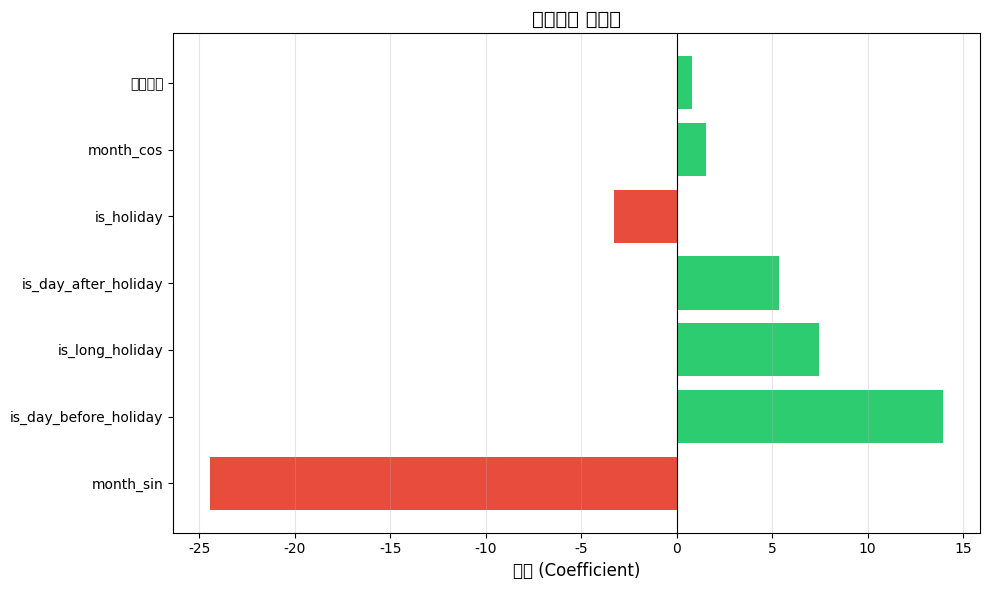


📈 결과 시각화


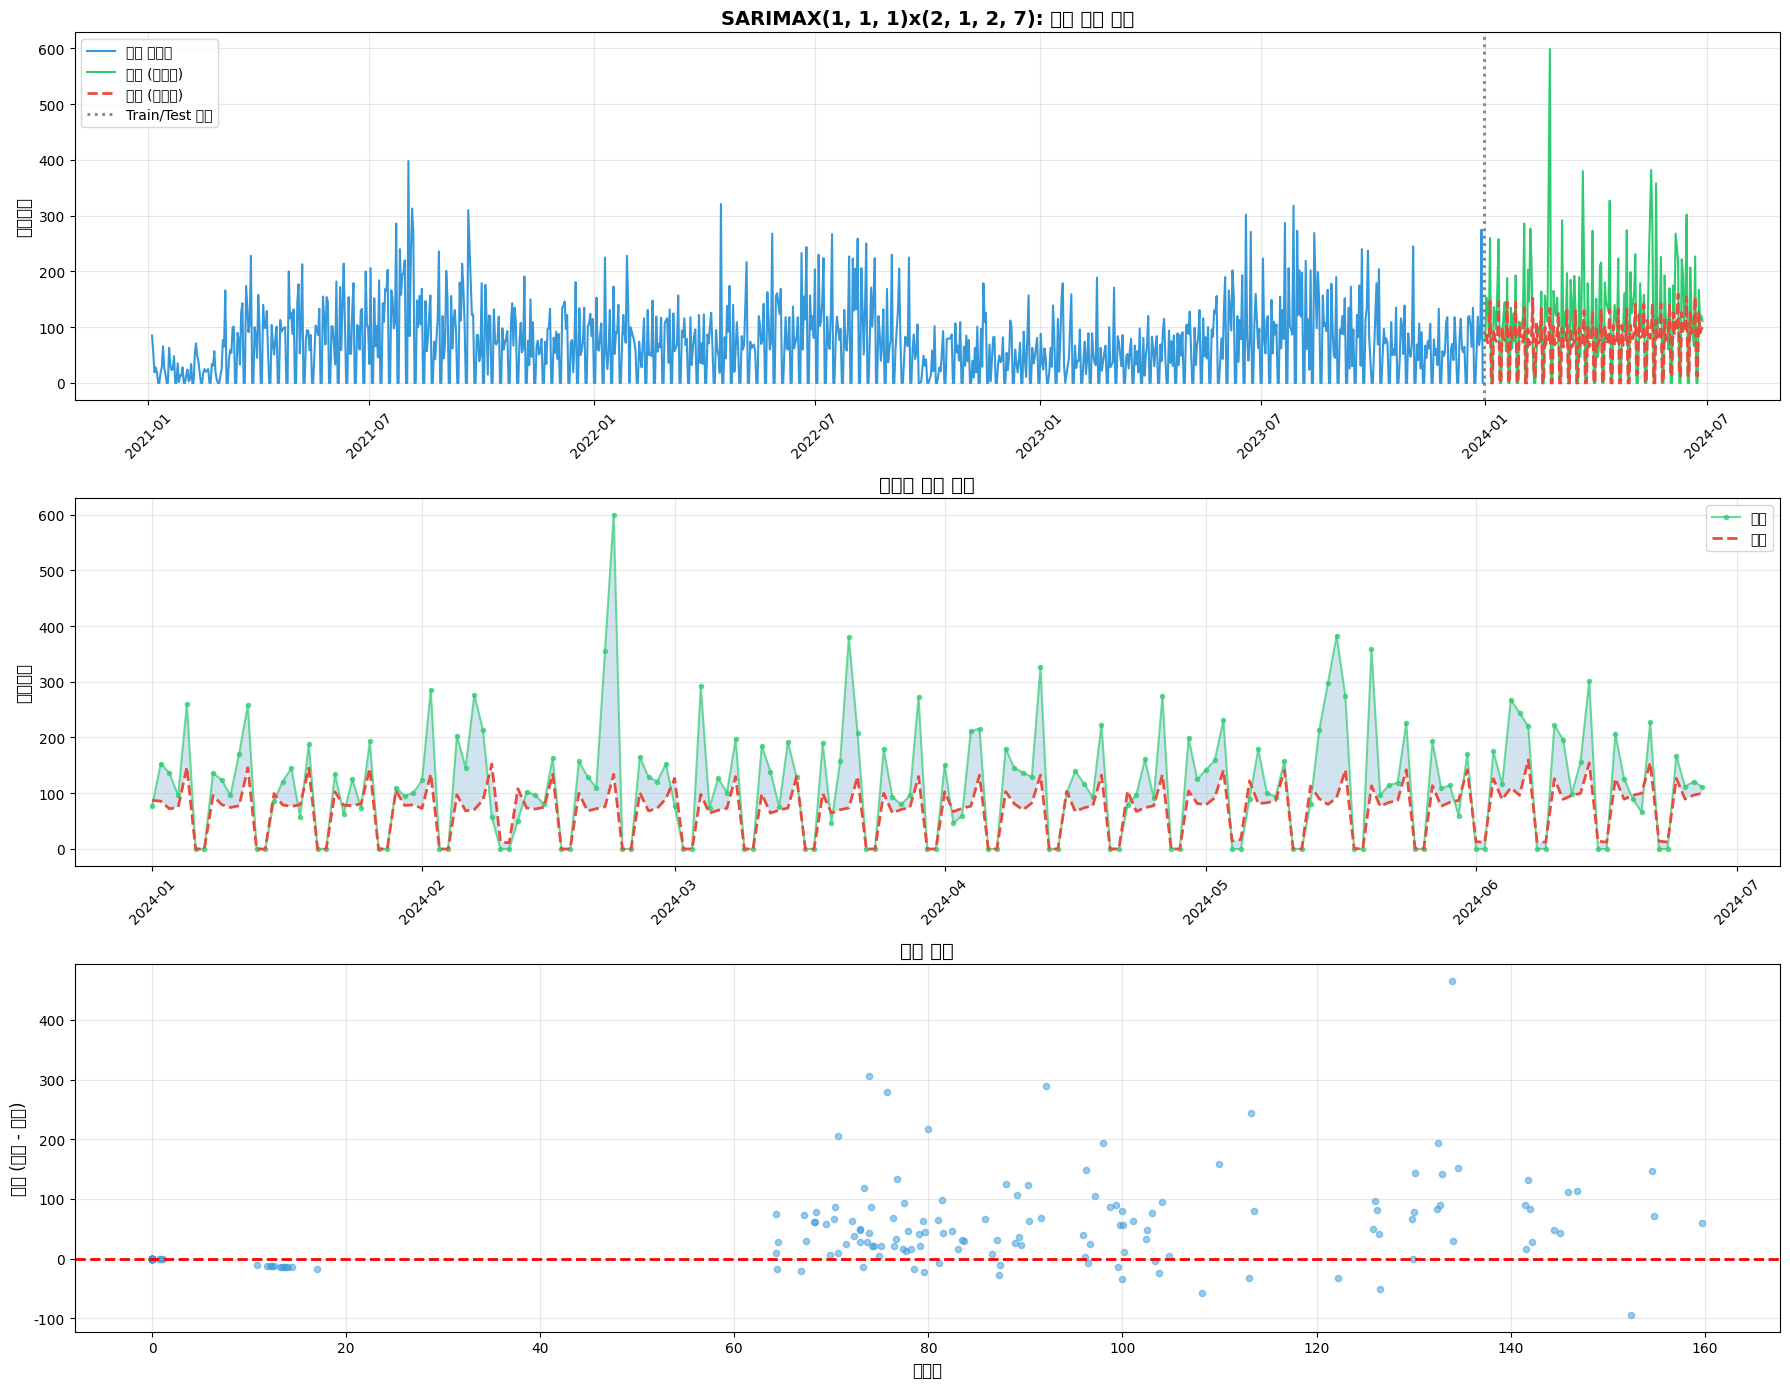


🔬 모델 진단


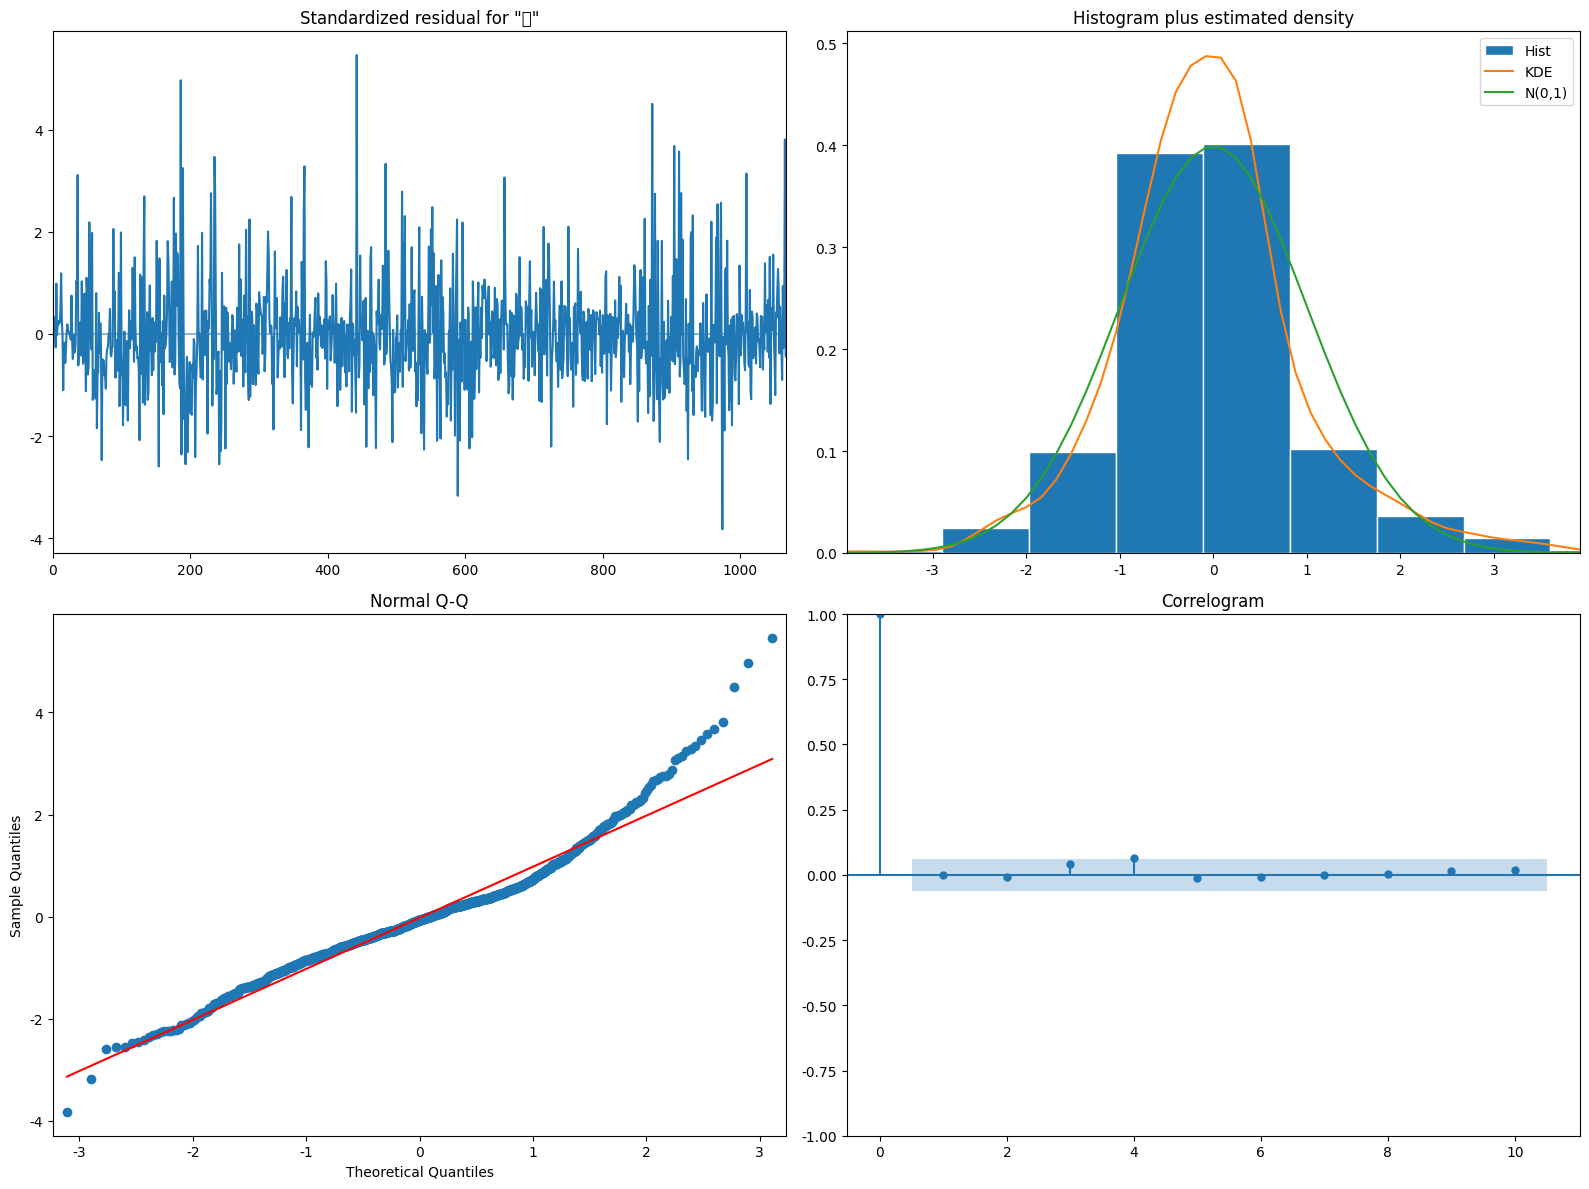

✅ 진단 플롯 완료

🔄 전체 데이터로 최종 모델 학습
✅ 최종 모델 학습 완료
   Order: (1, 1, 1)
   Seasonal Order: (2, 1, 2, 7)
   AIC: 13106.84
   BIC: 13178.64

💾 모델 저장
SARIMAX 최종 모델이 '/content/drive/MyDrive/유통경진대회/A_out_sarimax_model.pkl' 파일로 저장되었습니다.

✅ SARIMAX 모델링 완료!

📌 모델 정보:
   Order: SARIMAX(1, 1, 1)x(2, 1, 2, 7)
   외부변수: 7개
   테스트 RMSE: 83.33
   테스트 R²: 0.3117

🎯 다음 단계:
   1. 2025년 외부변수 데이터 준비
   2. 2025년 예측 코드 실행

💾 저장된 변수:
   - sarimax_model: 학습된 모델
   - sarimax_order: (1, 1, 1)
   - sarimax_seasonal_order: (2, 1, 2, 7)
   - sarimax_exog_columns: ['month_cos', 'is_day_before_holiday', 'month_sin', '민간소비', 'is_day_after_holiday', 'is_long_holiday', 'is_holiday']


In [127]:
# Try 1 조합으로 했을 때

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ========================================
# 1. 데이터 준비
# ========================================
print("="*60)
print("📊 SARIMAX 모델링 시작")
print("="*60)

# 외부변수 (외생변수) 선택
exog_columns = selected_features


# ========================================
# 3. SARIMAX 모델 학습 (최적 차수 사용)
# ========================================
print("\n" + "="*60)
print("🤖 SARIMAX 모델 학습")
print("="*60)

# 최적 차수: SARIMA(3,1,0)(3,1,0)[7]
order = (1, 1, 1)           # (p, d, q)
seasonal_order = (2, 1, 2, 7)  # (P, D, Q, s)

print(f"\n📌 모델 차수:")
print(f"   Order: {order}")
print(f"   Seasonal Order: {seasonal_order}")
print(f"   외부변수: {len(exog_columns)}개")
print(f"\n🔄 모델 학습 중... (시간이 다소 걸릴 수 있습니다)")

# SARIMAX 모델
model = SARIMAX(
    y_train,
    exog=X_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# 학습
fitted_model = model.fit(disp=False, maxiter=200)

print(f"\n✅ 학습 완료!")
print(f"   AIC: {fitted_model.aic:.2f}")
print(f"   BIC: {fitted_model.bic:.2f}")
print(f"   Log Likelihood: {fitted_model.llf:.2f}")


# ========================================
# 4. 모델 요약
# ========================================
print("\n" + "="*60)
print("📊 모델 요약")
print("="*60)
print(fitted_model.summary())


# ========================================
# 5. 테스트 데이터 예측 및 평가
# ========================================
print("\n" + "="*60)
print("🎯 테스트 데이터 예측")
print("="*60)

# 예측
y_pred_test = fitted_model.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)

# 음수 방지
y_pred_test = np.maximum(y_pred_test, 0)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / (y_test + 1e-5))) * 100
r2 = r2_score(y_test, y_pred_test)

print(f"\n📊 테스트 성능:")
print(f"   RMSE: {rmse:.2f}")
print(f"   MAE: {mae:.2f}")
print(f"   MAPE: {mape:.2f}%")
print(f"   R²: {r2:.4f}")


# ========================================
# 6. 외부변수 계수 분석
# ========================================

print("\n" + "="*60)
print("📈 외부변수 영향력 분석")
print("="*60)

params = fitted_model.params
# AR, MA, sigma2 관련 파라미터를 제외한 나머지가 외부변수 계수
exog_params = params.drop([p for p in params.index if p.startswith(('ar', 'ma', 'sigma2'))])
exog_params.index = exog_columns # 순서가 동일하므로 컬럼명 직접 매핑

if not exog_params.empty:
    exog_df = pd.DataFrame({'변수': exog_params.index, '계수': exog_params.values}).sort_values('계수', key=abs, ascending=False)

    print("\n외부변수 계수 (절댓값 기준 정렬):")
    print(exog_df.to_string(index=False))

    # 시각화
    plt.figure(figsize=(10, 6))
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in exog_df['계수']]
    plt.barh(exog_df['변수'], exog_df['계수'], color=colors)
    plt.xlabel('계수 (Coefficient)', fontsize=12)
    plt.title('외부변수 영향력', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


# ========================================
# 7. 시각화
# ========================================
print("\n" + "="*60)
print("📈 결과 시각화")
print("="*60)

fig, axes = plt.subplots(3, 1, figsize=(18, 14))

# 7-1. 전체 기간 (Train + Test)
ax1 = axes[0]
# Assuming '판매일' is available in the original df_sl DataFrame
train_dates = df_sl.loc[y_train.index, '판매일']
test_dates = df_sl.loc[y_test.index, '판매일']

ax1.plot(train_dates, y_train, label='훈련 데이터', color='#3498db', linewidth=1.5)
ax1.plot(test_dates, y_test, label='실제 (테스트)', color='#2ecc71', linewidth=1.5)
ax1.plot(test_dates, y_pred_test, label='예측 (테스트)', color='#e74c3c',
         linestyle='--', linewidth=2)
ax1.axvline(x=train_dates.iloc[-1], color='gray', linestyle=':', linewidth=2,
            label='Train/Test 분할')
ax1.set_title(f'SARIMAX{order}x{seasonal_order}: 전체 예측 결과',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('판매수량', fontsize=12)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# 7-2. 테스트 기간 확대
ax2 = axes[1]
ax2.plot(test_dates, y_test, label='실제', color='#2ecc71',
         marker='o', markersize=3, linewidth=1.5, alpha=0.7)
ax2.plot(test_dates, y_pred_test, label='예측', color='#e74c3c',
         linestyle='--', linewidth=2)
ax2.fill_between(test_dates, y_test.values, y_pred_test, alpha=0.2)
ax2.set_title('테스트 기간 확대', fontsize=14, fontweight='bold')
ax2.set_ylabel('판매수량', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# 7-3. 잔차 플롯
ax3 = axes[2]
residuals = y_test.values - y_pred_test
ax3.scatter(y_pred_test, residuals, alpha=0.5, s=20, color='#3498db')
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('예측값', fontsize=12)
ax3.set_ylabel('잔차 (실제 - 예측)', fontsize=12)
ax3.set_title('잔차 플롯', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ========================================
# 8. 진단 플롯
# ========================================
print("\n" + "="*60)
print("🔬 모델 진단")
print("="*60)

fig = fitted_model.plot_diagnostics(figsize=(16, 12))
plt.tight_layout()
plt.show()

print("✅ 진단 플롯 완료")


# ========================================
# 9. 최종 모델 (전체 데이터로 재학습)
# ========================================
print("\n" + "="*60)
print("🔄 전체 데이터로 최종 모델 학습")
print("="*60)

final_model = SARIMAX(y, exog=X, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
final_fitted = final_model.fit(disp=False, maxiter=200)

print("✅ 최종 모델 학습 완료")
print(f"   Order: {order}")
print(f"   Seasonal Order: {seasonal_order}")
print(f"   AIC: {final_fitted.aic:.2f}")
print(f"   BIC: {final_fitted.bic:.2f}")


# ========================================
# 10. 모델 저장
# ========================================

print("\n" + "="*60)
print("💾 모델 저장")
print("="*60)

# 저장할 최종 모델 객체는 'final_fitted' 입니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_sarimax_model.pkl'
final_fitted.save(filename)
print(f"SARIMAX 최종 모델이 '{filename}' 파일로 저장되었습니다.")

sarimax_model = final_fitted
sarimax_order = order
sarimax_seasonal_order = seasonal_order
sarimax_exog_columns = exog_columns

print("\n" + "="*60)
print("✅ SARIMAX 모델링 완료!")
print("="*60)
print(f"\n📌 모델 정보:")
print(f"   Order: SARIMAX{order}x{seasonal_order}")
print(f"   외부변수: {len(exog_columns)}개")
print(f"   테스트 RMSE: {rmse:.2f}")
print(f"   테스트 R²: {r2:.4f}")
print(f"\n🎯 다음 단계:")
print(f"   1. 2025년 외부변수 데이터 준비")
print(f"   2. 2025년 예측 코드 실행")
print(f"\n💾 저장된 변수:")
print(f"   - sarimax_model: 학습된 모델")
print(f"   - sarimax_order: {order}")
print(f"   - sarimax_seasonal_order: {seasonal_order}")
print(f"   - sarimax_exog_columns: {exog_columns}")

Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...

📈 결과 시각화


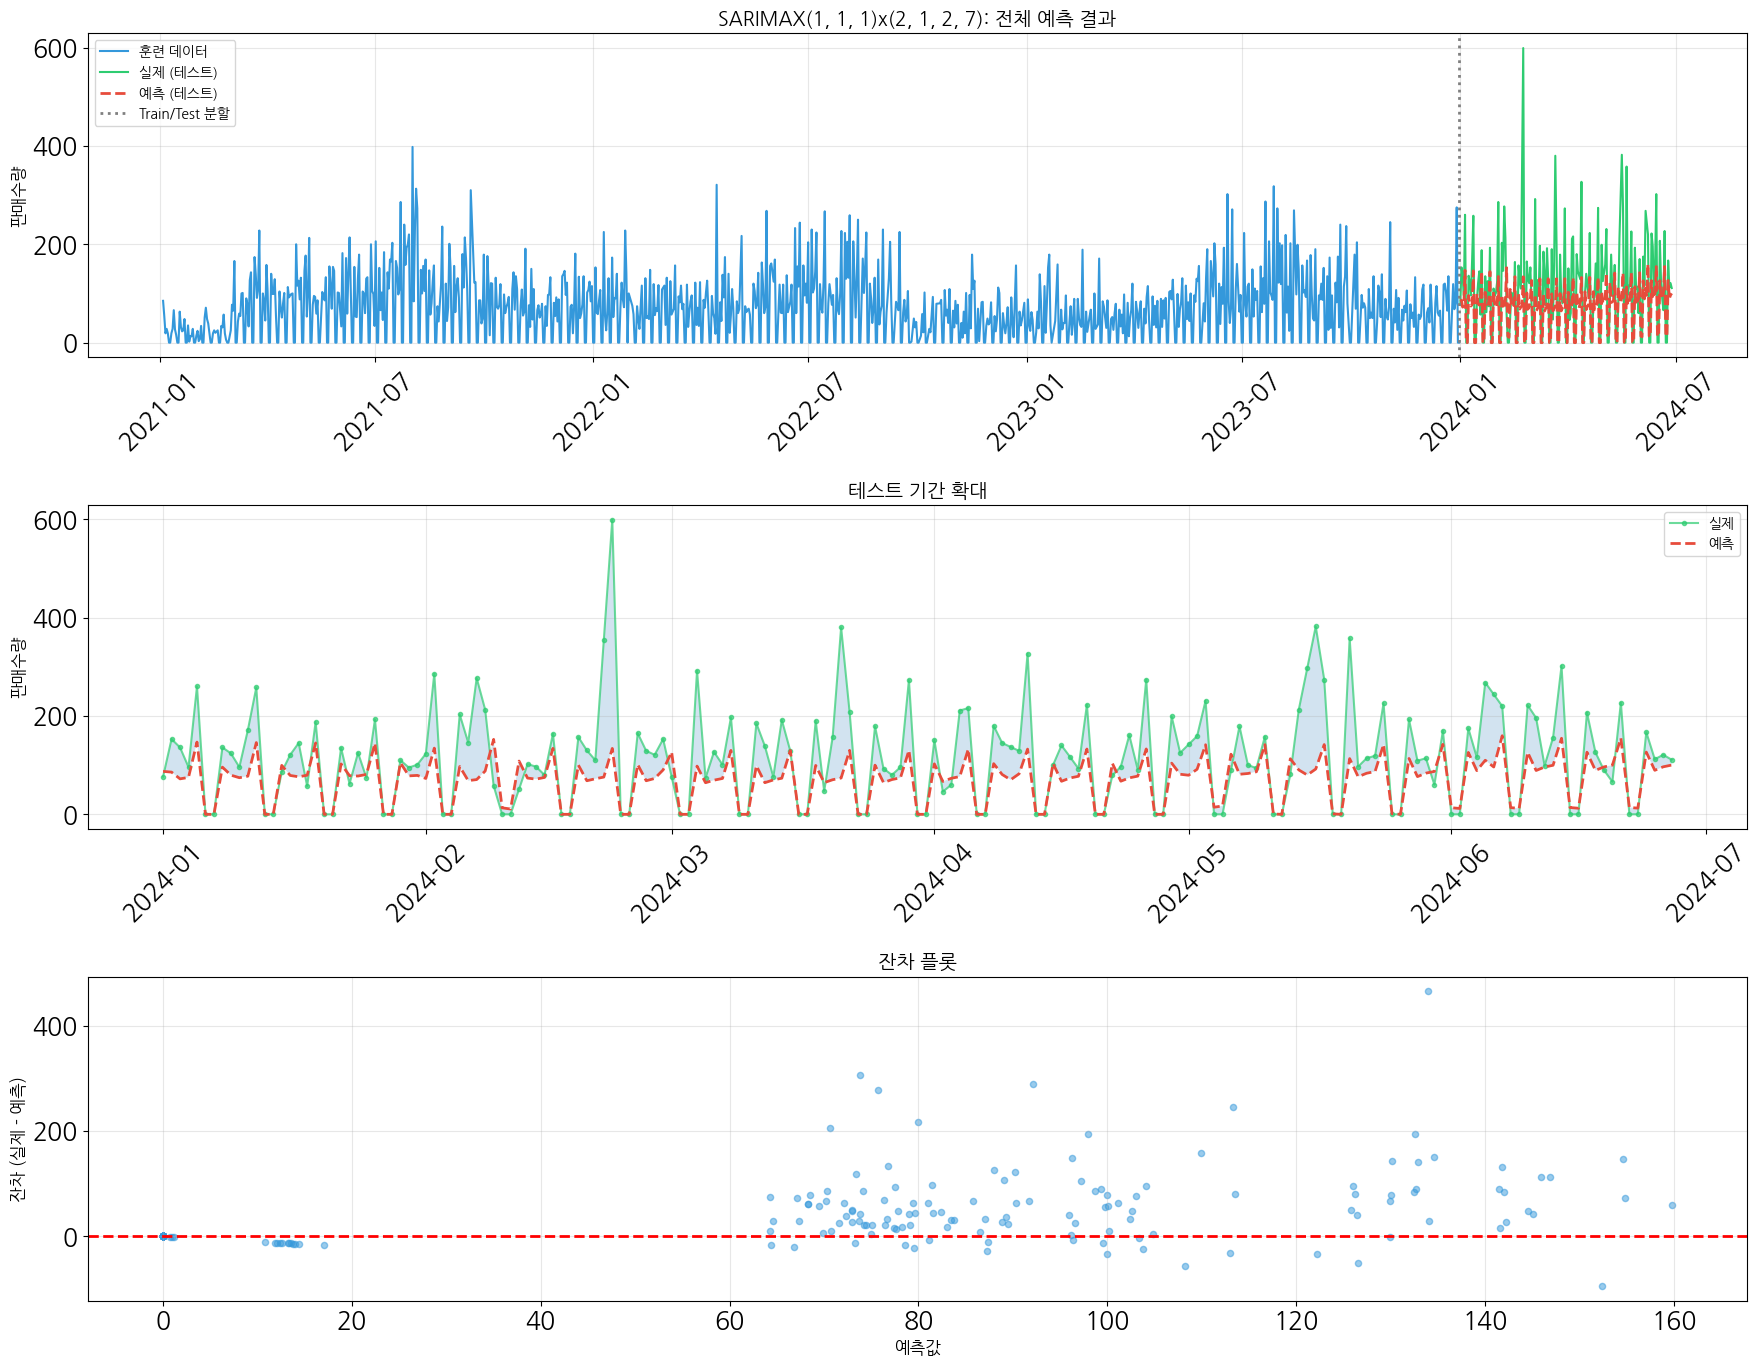


🔬 모델 진단


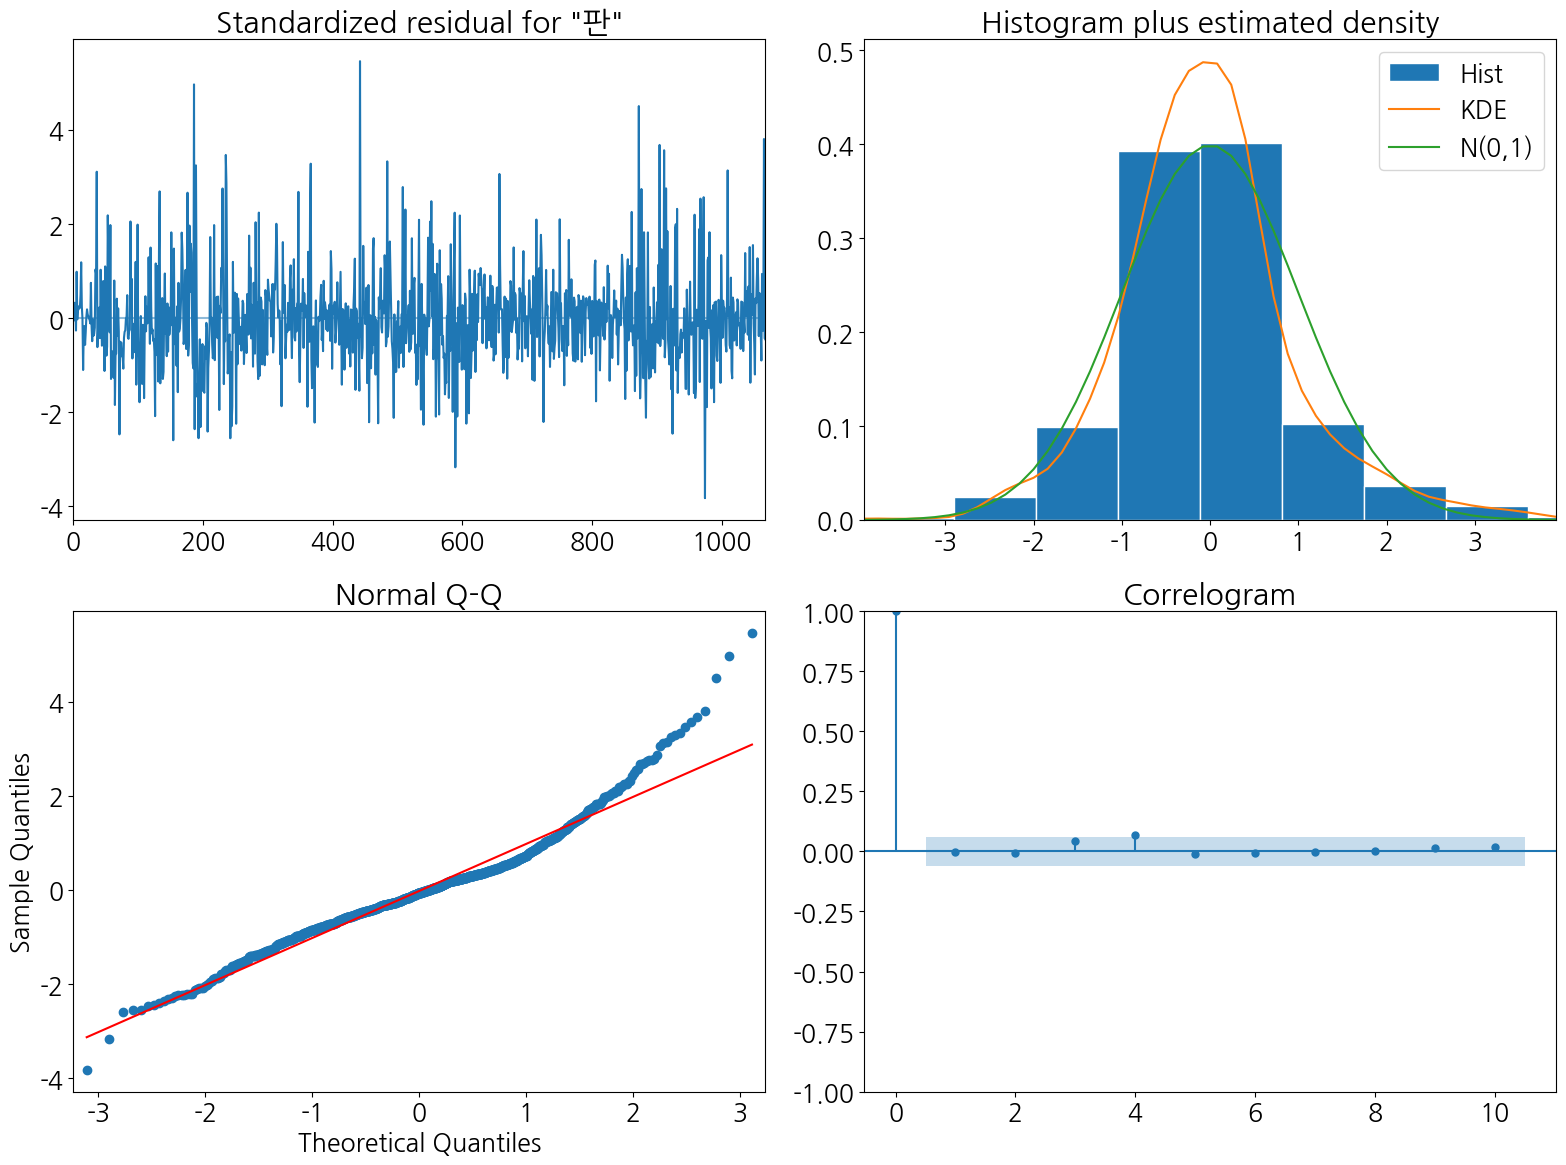

✅ 진단 플롯 완료

🔄 전체 데이터로 최종 모델 학습
✅ 최종 모델 학습 완료
   Order: (1, 1, 1)
   Seasonal Order: (2, 1, 2, 7)
   AIC: 13106.84
   BIC: 13178.64

💾 모델 저장
SARIMAX 최종 모델이 '/content/drive/MyDrive/유통경진대회/A_out_sarimax_model.pkl' 파일로 저장되었습니다.

✅ SARIMAX 모델링 완료!

📌 모델 정보:
   Order: SARIMAX(1, 1, 1)x(2, 1, 2, 7)
   외부변수: 7개
   테스트 RMSE: 83.33
   테스트 R²: 0.3117

🎯 다음 단계:
   1. 2025년 외부변수 데이터 준비
   2. 2025년 예측 코드 실행

💾 저장된 변수:
   - sarimax_model: 학습된 모델
   - sarimax_order: (1, 1, 1)
   - sarimax_seasonal_order: (2, 1, 2, 7)
   - sarimax_exog_columns: ['month_cos', 'is_day_before_holiday', 'month_sin', '민간소비', 'is_day_after_holiday', 'is_long_holiday', 'is_holiday']


In [131]:
!apt-get -qq install fonts-nanum
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 원하는 폰트 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가

plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

# ========================================
# 7. 시각화
# ========================================
print("\n" + "="*60)
print("📈 결과 시각화")
print("="*60)

fig, axes = plt.subplots(3, 1, figsize=(18, 14))

# 7-1. 전체 기간 (Train + Test)
ax1 = axes[0]
# Assuming '판매일' is available in the original df_sl DataFrame
train_dates = df_sl.loc[y_train.index, '판매일']
test_dates = df_sl.loc[y_test.index, '판매일']

ax1.plot(train_dates, y_train, label='훈련 데이터', color='#3498db', linewidth=1.5)
ax1.plot(test_dates, y_test, label='실제 (테스트)', color='#2ecc71', linewidth=1.5)
ax1.plot(test_dates, y_pred_test, label='예측 (테스트)', color='#e74c3c',
         linestyle='--', linewidth=2)
ax1.axvline(x=train_dates.iloc[-1], color='gray', linestyle=':', linewidth=2,
            label='Train/Test 분할')
ax1.set_title(f'SARIMAX{order}x{seasonal_order}: 전체 예측 결과',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('판매수량', fontsize=12)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# 7-2. 테스트 기간 확대
ax2 = axes[1]
ax2.plot(test_dates, y_test, label='실제', color='#2ecc71',
         marker='o', markersize=3, linewidth=1.5, alpha=0.7)
ax2.plot(test_dates, y_pred_test, label='예측', color='#e74c3c',
         linestyle='--', linewidth=2)
ax2.fill_between(test_dates, y_test.values, y_pred_test, alpha=0.2)
ax2.set_title('테스트 기간 확대', fontsize=14, fontweight='bold')
ax2.set_ylabel('판매수량', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# 7-3. 잔차 플롯
ax3 = axes[2]
residuals = y_test.values - y_pred_test
ax3.scatter(y_pred_test, residuals, alpha=0.5, s=20, color='#3498db')
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('예측값', fontsize=12)
ax3.set_ylabel('잔차 (실제 - 예측)', fontsize=12)
ax3.set_title('잔차 플롯', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ========================================
# 8. 진단 플롯
# ========================================
print("\n" + "="*60)
print("🔬 모델 진단")
print("="*60)

fig = fitted_model.plot_diagnostics(figsize=(16, 12))
plt.tight_layout()
plt.show()

print("✅ 진단 플롯 완료")


# ========================================
# 9. 최종 모델 (전체 데이터로 재학습)
# ========================================
print("\n" + "="*60)
print("🔄 전체 데이터로 최종 모델 학습")
print("="*60)

final_model = SARIMAX(y, exog=X, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
final_fitted = final_model.fit(disp=False, maxiter=200)

print("✅ 최종 모델 학습 완료")
print(f"   Order: {order}")
print(f"   Seasonal Order: {seasonal_order}")
print(f"   AIC: {final_fitted.aic:.2f}")
print(f"   BIC: {final_fitted.bic:.2f}")


# ========================================
# 10. 모델 저장
# ========================================

print("\n" + "="*60)
print("💾 모델 저장")
print("="*60)

# 저장할 최종 모델 객체는 'final_fitted' 입니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_sarimax_model.pkl'
final_fitted.save(filename)
print(f"SARIMAX 최종 모델이 '{filename}' 파일로 저장되었습니다.")

sarimax_model = final_fitted
sarimax_order = order
sarimax_seasonal_order = seasonal_order
sarimax_exog_columns = exog_columns

print("\n" + "="*60)
print("✅ SARIMAX 모델링 완료!")
print("="*60)
print(f"\n📌 모델 정보:")
print(f"   Order: SARIMAX{order}x{seasonal_order}")
print(f"   외부변수: {len(exog_columns)}개")
print(f"   테스트 RMSE: {rmse:.2f}")
print(f"   테스트 R²: {r2:.4f}")
print(f"\n🎯 다음 단계:")
print(f"   1. 2025년 외부변수 데이터 준비")
print(f"   2. 2025년 예측 코드 실행")
print(f"\n💾 저장된 변수:")
print(f"   - sarimax_model: 학습된 모델")
print(f"   - sarimax_order: {order}")
print(f"   - sarimax_seasonal_order: {seasonal_order}")
print(f"   - sarimax_exog_columns: {exog_columns}")

In [130]:
exog=X_test[exog_columns] # Use only selected columns for exog

# 인덱스 일치 확인
print(y.index.equals(exog.index))

# exog 결측 확인
print(exog.isnull().sum())

False
month_cos                0
is_day_before_holiday    0
month_sin                0
민간소비                     0
is_day_after_holiday     0
is_long_holiday          0
is_holiday               0
dtype: int64


In [132]:
print(exog.describe())
print(exog.sum())  # is_holiday 같은 0/1 컬럼이 거의 0인지 확인


          month_cos  is_day_before_holiday     month_sin        민간소비  \
count  1.790000e+02             179.000000  1.790000e+02  179.000000   
mean  -1.536313e-01               0.061453  6.318184e-01   -0.506039   
std    6.870599e-01               0.240832  3.292328e-01    0.206765   
min   -1.000000e+00               0.000000  1.224647e-16   -0.715710   
25%   -8.660254e-01               0.000000  5.000000e-01   -0.715710   
50%    6.123234e-17               0.000000  8.660254e-01   -0.303280   
75%    5.000000e-01               0.000000  8.660254e-01   -0.303280   
max    8.660254e-01               1.000000  1.000000e+00   -0.303280   

       is_day_after_holiday  is_long_holiday  is_holiday  
count            179.000000       179.000000  179.000000  
mean               0.067039         0.033520    0.067039  
std                0.250791         0.180494    0.250791  
min                0.000000         0.000000    0.000000  
25%                0.000000         0.000000    0.000000

### 로그화

📊 SARIMAX 모델링 시작

✅ 데이터 준비 완료

✂️  Train/Test 분리
✅ 분리 완료

🤖 SARIMAX 모델 학습

📌 모델 차수:
   Order: (1, 1, 1)
   Seasonal Order: (2, 1, 2, 7)
   외부변수: 9개

🔄 모델 학습 중... (시간이 다소 걸릴 수 있습니다)



✅ 학습 완료!
   AIC: 1563.35
   BIC: 1642.93
   Log Likelihood: -765.68

📊 모델 요약
                                       SARIMAX Results                                        
Dep. Variable:                                   판매수량   No. Observations:                 1092
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 7)   Log Likelihood                -765.677
Date:                                Mon, 13 Oct 2025   AIC                           1563.354
Time:                                        06:51:47   BIC                           1642.931
Sample:                                             0   HQIC                          1593.502
                                               - 1092                                         
Covariance Type:                                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

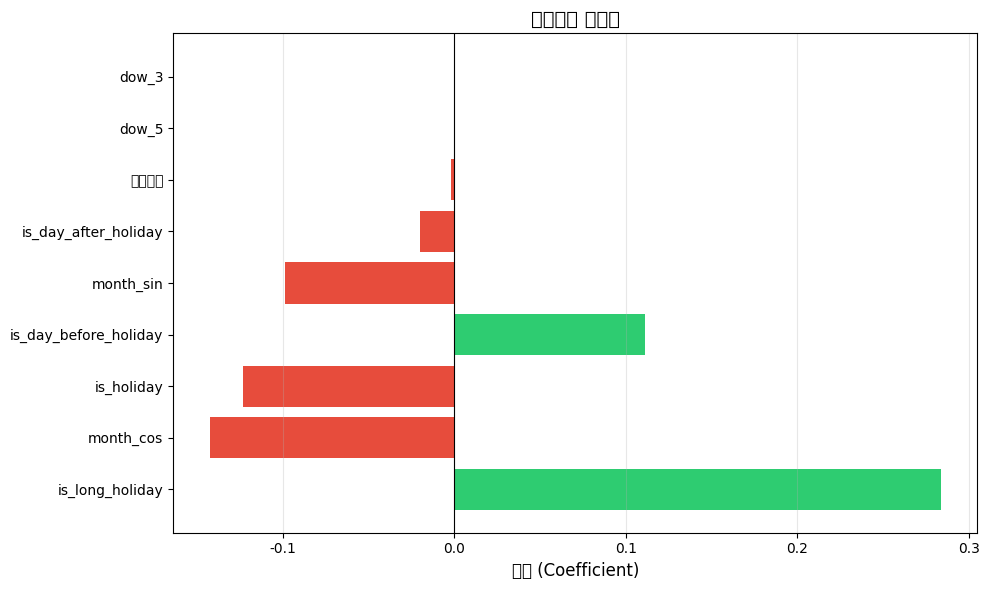


📈 결과 시각화


NameError: name 'y_pred_test' is not defined

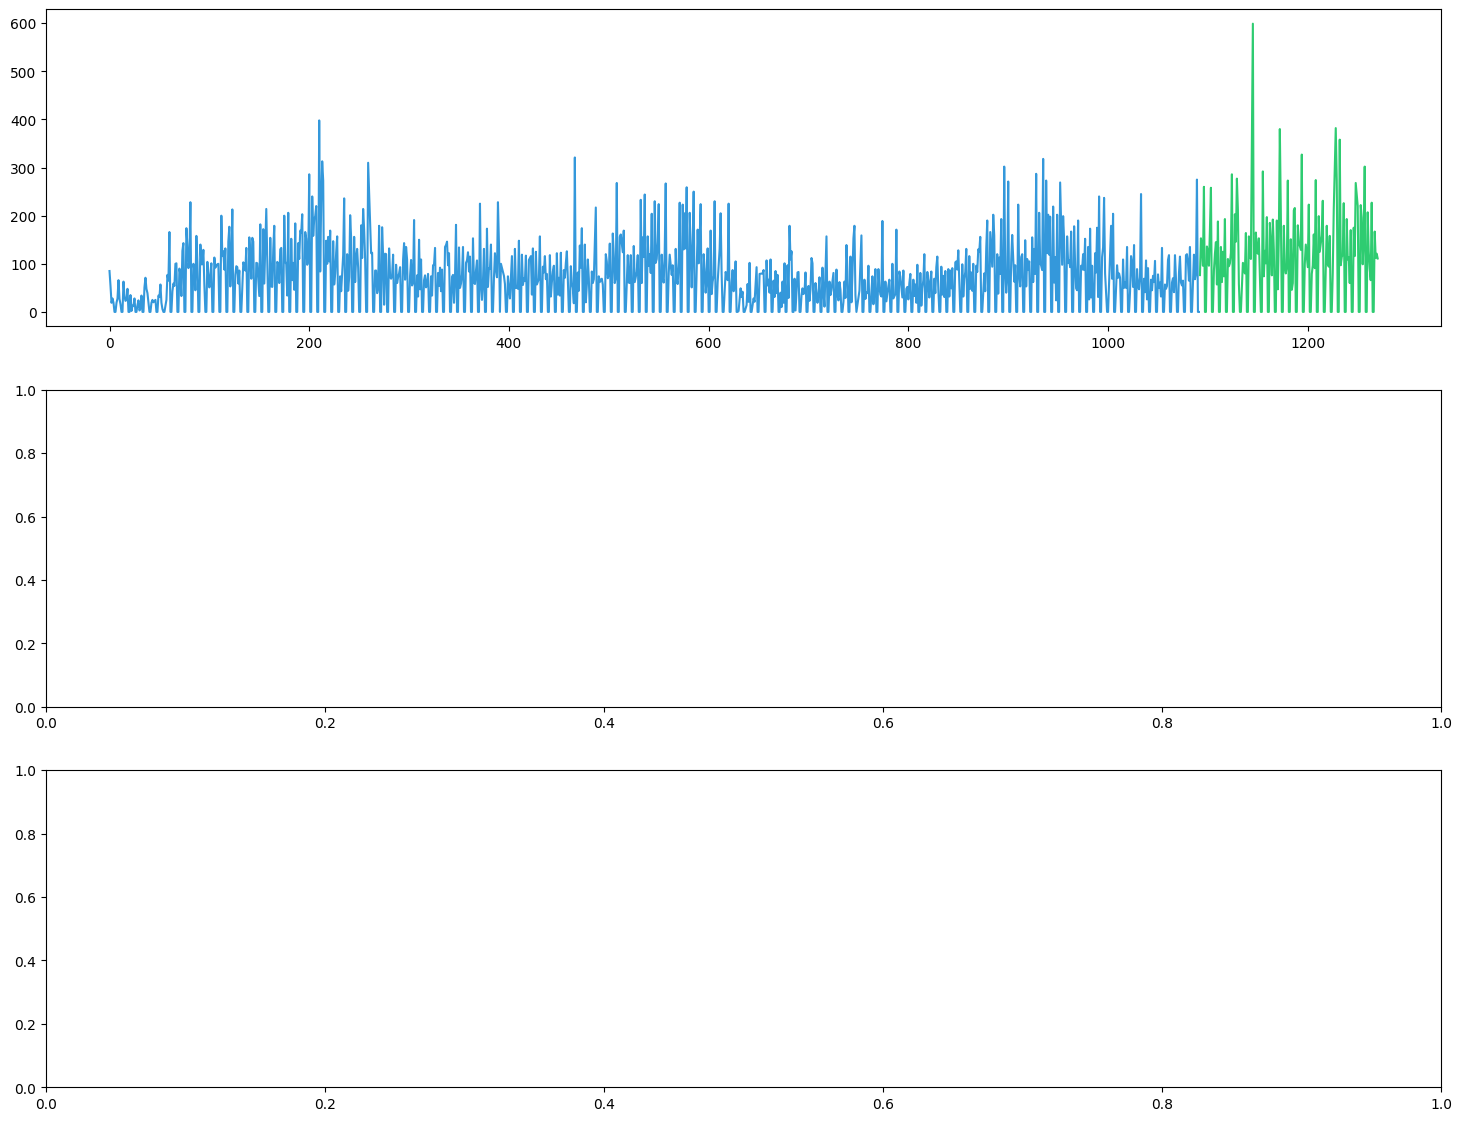

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ========================================
# 1. 데이터 준비
# ========================================
print("="*60)
print("📊 SARIMAX 모델링 시작")
print("="*60)

# 외부변수 (외생변수) 선택
exog_columns = ['month_cos', 'is_day_before_holiday', 'month_sin', '민간소비', 'is_day_after_holiday', 'is_long_holiday', 'is_holiday', 'dow_5', 'dow_3']

print(f"\n✅ 데이터 준비 완료")


# ========================================
# 2. Train/Test 분리
# ========================================
print("\n" + "="*60)
print("✂️  Train/Test 분리")
print("="*60)

y_train_log = np.log1p(y_train)

print(f"✅ 분리 완료")

# ========================================
# 3. SARIMAX 모델 학습 (최적 차수 사용)
# ========================================
print("\n" + "="*60)
print("🤖 SARIMAX 모델 학습")
print("="*60)

# 최적 차수: SARIMA(3,1,0)(3,1,0)[7]
order = (1, 1, 1)           # (p, d, q)
seasonal_order = (2, 1, 2, 7)  # (P, D, Q, s)

print(f"\n📌 모델 차수:")
print(f"   Order: {order}")
print(f"   Seasonal Order: {seasonal_order}")
print(f"   외부변수: {len(exog_columns)}개")
print(f"\n🔄 모델 학습 중... (시간이 다소 걸릴 수 있습니다)")

# SARIMAX 모델
model = SARIMAX(
    y_train_log,
    exog=X_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# 학습
fitted_model = model.fit(disp=False, maxiter=200)


print(f"\n✅ 학습 완료!")
print(f"   AIC: {fitted_model.aic:.2f}")
print(f"   BIC: {fitted_model.bic:.2f}")
print(f"   Log Likelihood: {fitted_model.llf:.2f}")


# ========================================
# 4. 모델 요약
# ========================================
print("\n" + "="*60)
print("📊 모델 요약")
print("="*60)
print(fitted_model.summary())


# ========================================
# 5. 테스트 데이터 예측 및 평가
# ========================================
print("\n" + "="*60)
print("🎯 테스트 데이터 예측")
print("="*60)

# 예측
y_pred_log = fitted_model.predict(
    start=len(y_train),
    end=len(y_train) + len(y_test) - 1,
    exog=X_test
)

# ✨️ [수정] 로그 스케일의 예측 결과를 원래 스케일로 되돌립니다.
y_pred_final = np.expm1(y_pred_log)
y_pred_final = np.maximum(y_pred_final, 0) # 음수 방지

# ✨️ [수정] 최종 예측 결과(y_pred_final)와 원본 y_test로 성능을 평가합니다.
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae = mean_absolute_error(y_test, y_pred_final)
mape = np.mean(np.abs((y_test - y_pred_final) / (y_test + 1e-5))) * 100
r2 = r2_score(y_test, y_pred_final)

print(f"\n📊 테스트 성능:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  MAPE: {mape:.2f}%")
print(f"  R²: {r2:.4f}")


# ========================================
# 6. 외부변수 계수 분석
# ========================================

print("\n" + "="*60)
print("📈 외부변수 영향력 분석")
print("="*60)

params = fitted_model.params
# AR, MA, sigma2 관련 파라미터를 제외한 나머지가 외부변수 계수
exog_params = params.drop([p for p in params.index if p.startswith(('ar', 'ma', 'sigma2'))])
exog_params.index = exog_columns # 순서가 동일하므로 컬럼명 직접 매핑

if not exog_params.empty:
    exog_df = pd.DataFrame({'변수': exog_params.index, '계수': exog_params.values}).sort_values('계수', key=abs, ascending=False)

    print("\n외부변수 계수 (절댓값 기준 정렬):")
    print(exog_df.to_string(index=False))

    # 시각화
    plt.figure(figsize=(10, 6))
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in exog_df['계수']]
    plt.barh(exog_df['변수'], exog_df['계수'], color=colors)
    plt.xlabel('계수 (Coefficient)', fontsize=12)
    plt.title('외부변수 영향력', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


# ========================================
# 7. 시각화
# ========================================
print("\n" + "="*60)
print("📈 결과 시각화")
print("="*60)

train_dates = X_train.index
test_dates = X_test.index
fig, axes = plt.subplots(3, 1, figsize=(18, 14))

# 7-1. 전체 기간 (Train + Test)
ax1 = axes[0]


ax1.plot(train_dates, y_train, label='훈련 데이터', color='#3498db', linewidth=1.5)
ax1.plot(test_dates, y_test, label='실제 (테스트)', color='#2ecc71', linewidth=1.5)
ax1.plot(test_dates, y_pred_test, label='예측 (테스트)', color='#e74c3c',
         linestyle='--', linewidth=2)
ax1.axvline(x=train_dates.iloc[-1], color='gray', linestyle=':', linewidth=2,
            label='Train/Test 분할')
ax1.set_title(f'SARIMAX{order}x{seasonal_order}: 전체 예측 결과',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('판매수량', fontsize=12)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# 7-2. 테스트 기간 확대
ax2 = axes[1]
ax2.plot(test_dates, y_test, label='실제', color='#2ecc71',
         marker='o', markersize=3, linewidth=1.5, alpha=0.7)
ax2.plot(test_dates, y_pred_test, label='예측', color='#e74c3c',
         linestyle='--', linewidth=2)
ax2.fill_between(test_dates, y_test.values, y_pred_test, alpha=0.2)
ax2.set_title('테스트 기간 확대', fontsize=14, fontweight='bold')
ax2.set_ylabel('판매수량', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# 7-3. 잔차 플롯
ax3 = axes[2]
residuals = y_test.values - y_pred_test
ax3.scatter(y_pred_test, residuals, alpha=0.5, s=20, color='#3498db')
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('예측값', fontsize=12)
ax3.set_ylabel('잔차 (실제 - 예측)', fontsize=12)
ax3.set_title('잔차 플롯', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ========================================
# 8. 진단 플롯
# ========================================
print("\n" + "="*60)
print("🔬 모델 진단")
print("="*60)

fig = fitted_model.plot_diagnostics(figsize=(16, 12))
plt.tight_layout()
plt.show()

print("✅ 진단 플롯 완료")


# ========================================
# 9. 최종 모델 (전체 데이터로 재학습)
# ========================================
print("\n" + "="*60)
print("🔄 전체 데이터로 최종 모델 학습")
print("="*60)

final_model = SARIMAX(y, exog=X, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
final_fitted = final_model.fit(disp=False, maxiter=200)

print("✅ 최종 모델 학습 완료")
print(f"   Order: {order}")
print(f"   Seasonal Order: {seasonal_order}")
print(f"   AIC: {final_fitted.aic:.2f}")
print(f"   BIC: {final_fitted.bic:.2f}")

In [ ]:
df_sl.to_csv('/content/drive/MyDrive/유통경진대회/A_out_7_sarimax_model.csv', index=False)

### 검증

In [ ]:
y_test['예측량'] = y_pred_test
y_test

,판매일,판매수량,예측량
1092,2024-01-01,912.0,1275.884911
1093,2024-01-02,1824.0,1538.514886
1094,2024-01-03,1889.0,1108.844963
1095,2024-01-04,1500.0,1092.125241
1096,2024-01-05,1520.0,3177.295552
...,...,...,...
1266,2024-06-23,0.0,414.930342
1267,2024-06-24,2570.0,1758.024885
1268,2024-06-25,1285.0,1877.354936
1269,2024-06-26,1187.0,1740.460365


In [ ]:
y_test['월'] = y_test['판매일'].dt.month
y_test

,판매일,판매수량,예측량,월
1092,2024-01-01,912.0,1275.884911,1
1093,2024-01-02,1824.0,1538.514886,1
1094,2024-01-03,1889.0,1108.844963,1
1095,2024-01-04,1500.0,1092.125241,1
1096,2024-01-05,1520.0,3177.295552,1
...,...,...,...,...
1266,2024-06-23,0.0,414.930342,6
1267,2024-06-24,2570.0,1758.024885,6
1268,2024-06-25,1285.0,1877.354936,6
1269,2024-06-26,1187.0,1740.460365,6


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test['판매수량'], y_test['예측량']))
mae = mean_absolute_error(y_test['판매수량'], y_test['예측량'])
mape = np.mean(np.abs((y_test['판매수량'] - y_test['예측량']) / (y_test['판매수량'] + 1e-5))) * 100
r2 = r2_score(y_test['판매수량'], y_test['예측량'])

print(f"\n📊 테스트 성능:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  MAPE: {mape:.2f}%")
print(f"  R²: {r2:.4f}")


📊 테스트 성능:
  RMSE: 680.81
  MAE: 479.88
  MAPE: 493798314.86%
  R²: 0.5877


In [ ]:
y_test_M = y_test.groupby('월')[['판매수량','예측량']].sum()
y_test_M.reset_index()

,월,판매수량,예측량
0,1,32177.0,35261.574825
1,2,35573.5,32359.379828
2,3,31007.0,36923.937094
3,4,44640.5,44434.416876
4,5,52606.0,54023.378898
5,6,48967.5,44043.896093


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_M['판매수량'], y_test_M['예측량']))
mae = mean_absolute_error(y_test_M['판매수량'], y_test_M['예측량'])
mape = np.mean(np.abs((y_test_M['판매수량'] - y_test_M['예측량']) / (y_test_M['판매수량'] + 1e-5))) * 100
r2 = r2_score(y_test_M['판매수량'], y_test_M['예측량'])

print(f"\n📊 테스트 성능:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  MAPE: {mape:.2f}%")
print(f"  R²: {r2:.4f}")


📊 테스트 성능:
  RMSE: 3677.60
  MAE: 3127.12
  MAPE: 8.49%
  R²: 0.8061


# 2025년

### Feature Engineering

In [ ]:
df_2024.tail()

,판매일,판매수량,Year,Month,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,...,dow_5,dow_6,month,month_sin,month_cos,dow_sin,dow_cos,평균기온(℃),최저기온(℃),최고기온(℃)
1266,2024-06-23,0.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,...,0,1,6,1.224647e-16,-1.0,-0.781831,0.623490,23.8,21.5,27.8
1267,2024-06-24,2570.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,...,0,0,6,1.224647e-16,-1.0,0.000000,1.000000,24.1,20.3,28.9
1268,2024-06-25,1285.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,...,0,0,6,1.224647e-16,-1.0,0.781831,0.623490,22.4,18.0,27.4
1269,2024-06-26,1187.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,...,0,0,6,1.224647e-16,-1.0,0.974928,-0.222521,22.8,16.8,29.1
1270,2024-06-27,1838.0,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,...,0,0,6,1.224647e-16,-1.0,0.433884,-0.900969,21.8,17.3,26.5


In [ ]:
# Create a date range for 2025-01-01 to 2025-03-31
date_range_2025 = pd.date_range(start='2024-06-28', end='2025-03-31', freq='D')

# Create a DataFrame with the '판매일' column
df_2025 = pd.DataFrame({'판매일': date_range_2025})


# Display the head and tail of the DataFrame
display(df_2025.head())
display(df_2025.tail())

,판매일
0,2024-06-28
1,2024-06-29
2,2024-06-30
3,2024-07-01
4,2024-07-02


,판매일
272,2025-03-27
273,2025-03-28
274,2025-03-29
275,2025-03-30
276,2025-03-31


In [ ]:
df_2025.set_index('판매일', inplace=True) # 인덱스로 설정

df_2025['년도'] = df_2025.index.year
df_2025['월'] = df_2025.index.month
df_2025.head()

,년도,월
판매일,,
2024-06-28,2024,6
2024-06-29,2024,6
2024-06-30,2024,6
2024-07-01,2024,7
2024-07-02,2024,7


#### 경제지표

In [ ]:
econ_list = econ['NAME'].unique()
df_econ = econ.pivot_table(
    index=['YEAR', 'MONTH'],  # 행(row)이 될 기준
    columns='NAME',           # 열(column)이 될 값들
    values='VALUE'            # 셀에 채워질 값
).reset_index()
df_econ.drop(columns = ['GDP', '평균소비성향'])
df_econ[41:51]

NAME,YEAR,MONTH,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,국제유가,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
41,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,84.11,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
42,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,85.20,...,0.4,2.6,3.0,5.4,2.6,103.7,9.9,13.0,112.4,67.9
43,2024,8,635.0868,7.256446,-3.6,99.4,100.7,0.1,94.5,80.09,...,0.4,1.6,2.1,5.4,2.0,100.8,1.8,5.5,113.5,67.9
44,2024,9,635.0868,7.256446,-3.6,99.5,100.7,0.1,94.0,73.76,...,0.4,1.0,1.5,5.4,1.6,100.0,-3.7,1.0,113.2,67.9
45,2024,10,650.0465,6.969401,-4.1,99.7,100.7,0.1,92.8,76.07,...,0.2,1.0,1.2,0.8,1.3,101.8,-2.5,1.7,113.8,68.1
46,2024,11,650.0465,6.969401,-4.1,99.4,100.7,0.1,93.0,74.09,...,0.2,1.4,1.6,0.8,1.5,100.7,2.8,7.0,112.4,68.1
47,2024,12,650.0465,6.969401,-4.1,99.3,100.5,0.1,83.3,74.00,...,0.2,1.7,2.2,0.8,1.9,88.2,6.8,10.5,114.4,68.1
48,2025,1,647.2267,NaN,-3.1,98.9,100.2,-0.2,86.7,80.80,...,-0.1,1.8,2.5,-0.4,2.2,91.2,6.5,8.6,112.6,NaN
49,2025,2,647.2267,NaN,-3.1,99.1,100.3,-0.2,90.2,76.32,...,-0.1,1.5,2.6,-0.4,2.0,95.2,4.3,6.3,113.4,NaN
50,2025,3,647.2267,NaN,-3.1,99.3,100.5,-0.2,87.2,72.98,...,-0.1,1.3,2.4,-0.4,2.1,93.4,3.4,6.4,114.6,NaN


In [ ]:
target_econ = df_econ[41:51]
display(target_econ)

NAME,YEAR,MONTH,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,국제유가,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
41,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,84.11,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
42,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,85.20,...,0.4,2.6,3.0,5.4,2.6,103.7,9.9,13.0,112.4,67.9
43,2024,8,635.0868,7.256446,-3.6,99.4,100.7,0.1,94.5,80.09,...,0.4,1.6,2.1,5.4,2.0,100.8,1.8,5.5,113.5,67.9
44,2024,9,635.0868,7.256446,-3.6,99.5,100.7,0.1,94.0,73.76,...,0.4,1.0,1.5,5.4,1.6,100.0,-3.7,1.0,113.2,67.9
45,2024,10,650.0465,6.969401,-4.1,99.7,100.7,0.1,92.8,76.07,...,0.2,1.0,1.2,0.8,1.3,101.8,-2.5,1.7,113.8,68.1
46,2024,11,650.0465,6.969401,-4.1,99.4,100.7,0.1,93.0,74.09,...,0.2,1.4,1.6,0.8,1.5,100.7,2.8,7.0,112.4,68.1
47,2024,12,650.0465,6.969401,-4.1,99.3,100.5,0.1,83.3,74.00,...,0.2,1.7,2.2,0.8,1.9,88.2,6.8,10.5,114.4,68.1
48,2025,1,647.2267,NaN,-3.1,98.9,100.2,-0.2,86.7,80.80,...,-0.1,1.8,2.5,-0.4,2.2,91.2,6.5,8.6,112.6,NaN
49,2025,2,647.2267,NaN,-3.1,99.1,100.3,-0.2,90.2,76.32,...,-0.1,1.5,2.6,-0.4,2.0,95.2,4.3,6.3,113.4,NaN
50,2025,3,647.2267,NaN,-3.1,99.3,100.5,-0.2,87.2,72.98,...,-0.1,1.3,2.4,-0.4,2.1,93.4,3.4,6.4,114.6,NaN


In [ ]:
target_econ[target_econ['가구당월평균소득'].isnull()]

NAME,YEAR,MONTH,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,국제유가,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
48,2025,1,647.2267,NaN,-3.1,98.9,100.2,-0.2,86.7,80.80,...,-0.1,1.8,2.5,-0.4,2.2,91.2,6.5,8.6,112.6,NaN
49,2025,2,647.2267,NaN,-3.1,99.1,100.3,-0.2,90.2,76.32,...,-0.1,1.5,2.6,-0.4,2.0,95.2,4.3,6.3,113.4,NaN
50,2025,3,647.2267,NaN,-3.1,99.3,100.5,-0.2,87.2,72.98,...,-0.1,1.3,2.4,-0.4,2.1,93.4,3.4,6.4,114.6,NaN


In [ ]:
# target_econ['가구당월평균소득'].isnull() = 7.661358 # Incorrect syntax

# Correct way to fill NaN values using .loc and isnull()
target_econ.loc[target_econ['가구당월평균소득'].isnull(), '가구당월평균소득'] = 7.661358

# Verify the changes
display(target_econ['가구당월평균소득'])

,가구당월평균소득
41,6.832134
42,7.256446
43,7.256446
44,7.256446
45,6.969401
46,6.969401
47,6.969401
48,7.661358
49,7.661358
50,7.661358


In [ ]:
df_2025 = df_2025.reset_index() # Reset the index to make '판매일' a column again
df_2025_econ = df_2025.merge(target_econ, left_on=['년도', '월'], right_on=['YEAR', 'MONTH'], how='left')
df_2025_econ.head()

,판매일,년도,월,YEAR,MONTH,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
0,2024-06-28,2024,6,2024,6,638.1754,6.832134,-3.3,99.9,100.8,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
1,2024-06-29,2024,6,2024,6,638.1754,6.832134,-3.3,99.9,100.8,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
2,2024-06-30,2024,6,2024,6,638.1754,6.832134,-3.3,99.9,100.8,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
3,2024-07-01,2024,7,2024,7,635.0868,7.256446,-3.6,99.5,100.8,...,0.4,2.6,3.0,5.4,2.6,103.7,9.9,13.0,112.4,67.9
4,2024-07-02,2024,7,2024,7,635.0868,7.256446,-3.6,99.5,100.8,...,0.4,2.6,3.0,5.4,2.6,103.7,9.9,13.0,112.4,67.9


In [ ]:
df_2025_econ.drop(columns = ['YEAR','MONTH'], inplace=True)

In [ ]:
df_2025_econ

,판매일,년도,월,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,...,민간소비,생산자물가지수,생활물가지수,설비투자,소비자물가지수,소비자심리지수,수입물가지수,수출물가지수,전산업생산지수,평균소비성향
0,2024-06-28,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
1,2024-06-29,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
2,2024-06-30,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0.0,2.5,2.8,0.0,2.4,100.9,9.6,12.1,113.1,69.6
3,2024-07-01,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,0.4,2.6,3.0,5.4,2.6,103.7,9.9,13.0,112.4,67.9
4,2024-07-02,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,0.4,2.6,3.0,5.4,2.6,103.7,9.9,13.0,112.4,67.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2025-03-27,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,-0.1,1.3,2.4,-0.4,2.1,93.4,3.4,6.4,114.6,NaN
273,2025-03-28,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,-0.1,1.3,2.4,-0.4,2.1,93.4,3.4,6.4,114.6,NaN
274,2025-03-29,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,-0.1,1.3,2.4,-0.4,2.1,93.4,3.4,6.4,114.6,NaN
275,2025-03-30,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,-0.1,1.3,2.4,-0.4,2.1,93.4,3.4,6.4,114.6,NaN


#### 공휴일

In [ ]:
#!pip install holidayskr

KeyboardInterrupt: 

In [ ]:
from holidayskr import is_holiday, year_holidays


def create_holiday_features(df, date_column=None):
    """
    holidayskr 라이브러리를 사용한 공휴일 Feature Engineering

    Parameters:
    -----------
    df : DataFrame
        원본 데이터프레임
    date_column : str, optional
        날짜 컬럼명 (None이면 자동 감지)

    Returns:
    --------
    DataFrame : 공휴일 feature가 추가된 데이터프레임
    """

    df = df.copy()

    # 날짜 컬럼 자동 감지
    if date_column is None:
        date_candidates = ['판매일', '날짜', 'date', 'Date', '일자', '판매날짜']
        for col in date_candidates:
            if col in df.columns:
                date_column = col
                break

        if date_column is None:
            for col in df.columns:
                if df[col].dtype == 'object' or 'date' in str(df[col].dtype).lower():
                    try:
                        pd.to_datetime(df[col].head())
                        date_column = col
                        break
                    except:
                        continue

    if date_column is None:
        raise ValueError("날짜 컬럼을 찾을 수 없습니다. date_column 파라미터를 명시해주세요.")

    print("\n" + "="*60)
    print("holidayskr를 사용한 공휴일 Feature 생성")
    print("="*60)
    print(f"[사용할 날짜 컬럼] {date_column}")

    df[date_column] = pd.to_datetime(df[date_column])

    # 날짜 범위 확인
    min_date = df[date_column].min()
    max_date = df[date_column].max()
    print(f"데이터 기간: {min_date.date()} ~ {max_date.date()}")

    # holidayskr로 전체 공휴일 정보 가져오기
    # 필요한 연도 목록 생성
    years = list(range(min_date.year, max_date.year + 1))

    print(f"\n공휴일 정보 수집 중... (연도: {years})")

    # 연도별 공휴일 수집
    all_holidays = {}
    for year in years:
        year_hols = year_holidays(str(year))
        for holiday_date, holiday_name in year_hols:
            all_holidays[holiday_date] = holiday_name

    # 공휴일 DataFrame 생성
    holiday_df = pd.DataFrame([
        {'date': date, 'holiday_name': name}
        for date, name in all_holidays.items()
    ])

    if len(holiday_df) > 0:
        holiday_df['date'] = pd.to_datetime(holiday_df['date'])
        holiday_df['is_holiday'] = 1
        print(f"\n총 {len(holiday_df)}개의 공휴일 발견")
        print("\n[공휴일 목록 샘플 (최근 15개)]")
        print(holiday_df.sort_values('date').tail(15).to_string(index=False))
    else:
        holiday_df = pd.DataFrame(columns=['date', 'is_holiday', 'holiday_name'])
        print("\n공휴일 정보를 찾을 수 없습니다.")

    # 원본 데이터에 날짜만 추출한 컬럼 생성 (merge용)
    df['date_only'] = df[date_column].dt.date
    holiday_df['date_only'] = holiday_df['date'].dt.date

    # 1. 기본 공휴일 여부 및 이름 merge
    df = df.merge(
        holiday_df[['date_only', 'is_holiday', 'holiday_name']],
        on='date_only',
        how='left'
    )
    df['is_holiday'] = df['is_holiday'].fillna(0).astype(int)
    df['holiday_name'] = df['holiday_name'].fillna('')

    # 공휴일 날짜 set 생성 (빠른 조회를 위해)
    holiday_dates_set = set(holiday_df['date_only'].tolist())

    # 2. 연휴 구간 판단 (전날 또는 다음날이 공휴일)
    def check_long_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        prev_date = date_obj - timedelta(days=1)
        next_date = date_obj + timedelta(days=1)

        if date_obj in holiday_dates_set:
            if prev_date in holiday_dates_set or next_date in holiday_dates_set:
                return 1
        return 0

    df['is_long_holiday'] = df[date_column].apply(check_long_holiday)

    # 3. 공휴일까지 남은 일수 (향후 7일 이내)
    def days_to_next_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        for i in range(1, 8):  # 7일 이내
            future_date = date_obj + timedelta(days=i)
            if future_date in holiday_dates_set:
                return i
        return 0

    df['days_to_holiday'] = df[date_column].apply(days_to_next_holiday)

    # 4. 공휴일 이후 경과 일수 (과거 7일 이내)
    def days_from_past_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        for i in range(1, 8):  # 7일 이내
            past_date = date_obj - timedelta(days=i)
            if past_date in holiday_dates_set:
                return i
        return 0

    df['days_from_holiday'] = df[date_column].apply(days_from_past_holiday)

    # 5. 공휴일 전날 (장보기 수요 증가)
    df['is_day_before_holiday'] = (df['days_to_holiday'] == 1).astype(int)

    # 6. 공휴일 다음날
    df['is_day_after_holiday'] = (df['days_from_holiday'] == 1).astype(int)

    # 7. 주요 공휴일 개별 인코딩
    df['is_lunar_new_year'] = df['holiday_name'].str.contains(
        '설날|구정', case=False, na=False, regex=True
    ).astype(int)

    df['is_chuseok'] = df['holiday_name'].str.contains(
        '추석', case=False, na=False
    ).astype(int)

    df['is_independence_day'] = df['holiday_name'].str.contains(
        '광복절|삼일절|개천절|한글날', case=False, na=False, regex=True
    ).astype(int)

    df['is_childrens_day'] = df['holiday_name'].str.contains(
        '어린이날', case=False, na=False
    ).astype(int)

    df['is_memorial_day'] = df['holiday_name'].str.contains(
        '현충일', case=False, na=False
    ).astype(int)

    df['is_national_foundation_day'] = df['holiday_name'].str.contains(
        '개천절', case=False, na=False
    ).astype(int)

    # 8. 여름 휴가 시즌 (7-8월, 공휴일 아니지만 계절 효과)
    df['is_summer_vacation'] = (
        df[date_column].dt.month.isin([7, 8])
    ).astype(int)

    # 9. 연말연시 시즌 (12월 말 ~ 1월 초)
    df['is_year_end_season'] = (
        ((df[date_column].dt.month == 12) & (df[date_column].dt.day >= 20)) |
        ((df[date_column].dt.month == 1) & (df[date_column].dt.day <= 7))
    ).astype(int)

    # date_only 컬럼 제거 (임시 컬럼)
    df = df.drop('date_only', axis=1)

    print("\n[생성된 공휴일 Feature 목록]")
    holiday_features = [
        'is_holiday', 'holiday_name', 'is_long_holiday',
        'days_to_holiday', 'days_from_holiday',
        'is_day_before_holiday', 'is_day_after_holiday',
        'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
        'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
        'is_summer_vacation', 'is_year_end_season'
    ]

    for i, feat in enumerate(holiday_features, 1):
        if feat in df.columns:
            print(f"  {i:2d}. {feat}")

    # 공휴일 통계
    print(f"\n[공휴일 통계]")
    print(f"총 공휴일 일수: {df['is_holiday'].sum()}")
    print(f"공휴일 전날: {df['is_day_before_holiday'].sum()}")
    print(f"연휴 기간: {df['is_long_holiday'].sum()}")
    print(f"설날 연휴: {df['is_lunar_new_year'].sum()}")
    print(f"추석 연휴: {df['is_chuseok'].sum()}")

    return df



In [ ]:
df_with_holidays = create_holiday_features(df_2025_econ)


holidayskr를 사용한 공휴일 Feature 생성
[사용할 날짜 컬럼] 판매일
데이터 기간: 2024-06-28 ~ 2025-03-31

공휴일 정보 수집 중... (연도: [2024, 2025])

총 39개의 공휴일 발견

[공휴일 목록 샘플 (최근 15개)]
      date               holiday_name  is_holiday
2025-03-01                       3·1절           1
2025-03-03               대체 공휴일(3·1절)           1
2025-05-01                     근로자의 날           1
2025-05-05                      석가탄신일           1
2025-05-06 대체 공휴일(어린이날, 석가탄신일 중복 공휴일)           1
2025-06-03            대체 공휴일(대통령 선거일)           1
2025-06-06                        현충일           1
2025-08-15                        광복절           1
2025-10-03                        개천절           1
2025-10-05                      추석 전날           1
2025-10-06                         추석           1
2025-10-07                     추석 다음날           1
2025-10-08                 대체 공휴일(추석)           1
2025-10-09                        한글날           1
2025-12-25                      크리스마스           1

[생성된 공휴일 Feature 목록]
   1. is_holiday
   2. hol

In [ ]:
df_with_holidays.columns

Index(['판매일', '년도', '월', 'GDP', '가구당월평균소득', '건설투자', '경기동행지수', '경기선행지수',
       '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비', '생산자물가지수', '생활물가지수',
       '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수', '전산업생산지수', '평균소비성향',
       'is_holiday', 'holiday_name', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
       'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
       'is_summer_vacation', 'is_year_end_season'],
      dtype='object')

In [ ]:
df_with_holidays.drop(columns = 'holiday_name', inplace = True)

In [ ]:
df_with_holidays.shape

(277, 37)

In [ ]:
df_with_holidays.head()

,판매일,년도,월,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,...,is_day_before_holiday,is_day_after_holiday,is_lunar_new_year,is_chuseok,is_independence_day,is_childrens_day,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season
0,2024-06-28,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0,0,0,0,0,0,0,0,0,0
1,2024-06-29,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0,0,0,0,0,0,0,0,0,0
2,2024-06-30,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0,0,0,0,0,0,0,0,0,0
3,2024-07-01,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,0,0,0,0,0,0,0,0,1,0
4,2024-07-02,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,0,0,0,0,0,0,0,0,1,0


#### 주말 여부

In [ ]:
# ============================================
# 3. 달력 Features
# ============================================
# 주말 여부
df_with_holidays['day_of_week'] = df_with_holidays['판매일'].dt.dayofweek
df_with_holidays['day_of_month'] = df_with_holidays['판매일'].dt.day
df_with_holidays['is_weekend'] = (df_with_holidays['day_of_week'] >= 5).astype(int)

# 월초/월말
df_with_holidays['is_month_start'] = (df_with_holidays['day_of_month'] <= 3).astype(int)
df_with_holidays['is_month_end'] = (df_with_holidays['day_of_month'] >= 28).astype(int)

# 해당 월의 주말 개수 (미리 계산)
weekend_count = df_with_holidays.groupby(['년도', '월', 'is_weekend']).size().unstack(fill_value=0)
if 1 in weekend_count.columns:
    weekend_count = weekend_count[1].reset_index()
    weekend_count.columns = ['년도', '월', 'weekend_count_in_month']
    df_with_holidays = df_with_holidays.merge(weekend_count, on=['년도', '월'], how='left')
else:
    df_with_holidays['weekend_count_in_month'] = 0

In [ ]:
df_with_holidays.columns

Index(['판매일', '년도', '월', 'GDP', '가구당월평균소득', '건설투자', '경기동행지수', '경기선행지수',
       '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비', '생산자물가지수', '생활물가지수',
       '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수', '전산업생산지수', '평균소비성향',
       'is_holiday', 'is_long_holiday', 'days_to_holiday', 'days_from_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_lunar_new_year',
       'is_chuseok', 'is_independence_day', 'is_childrens_day',
       'is_memorial_day', 'is_national_foundation_day', 'is_summer_vacation',
       'is_year_end_season', 'day_of_week', 'day_of_month', 'is_weekend',
       'is_month_start', 'is_month_end', 'weekend_count_in_month'],
      dtype='object')

In [ ]:
df_with_holidays.shape

(277, 43)

#### 요일 원핫

In [ ]:
# 요일 원핫인코딩 (0=월요일 ~ 6=일요일)
dow_dummies = pd.get_dummies(df_with_holidays['day_of_week'], prefix='dow', dtype=int)
df_final = pd.concat([df_with_holidays, dow_dummies], axis=1)

In [ ]:
# 요일 분포 확인
print(df_final['day_of_week'].value_counts().sort_index())
# 0(월) ~ 6(일) 중 뭐가 있는지

# # 2021-2024년 데이터면 일요일이 수백 개는 있어야 정상

# 일요일만 필터링
sundays = df_final[df_final['day_of_week'] == 6]
print(f"일요일 데이터: {len(sundays)}개")

day_of_week
0    40
1    39
2    39
3    39
4    40
5    40
6    40
Name: count, dtype: int64
일요일 데이터: 40개


In [ ]:
cols = df_final.columns
for c in cols:
  display(df_final[c].head())

,판매일
0,2024-06-28
1,2024-06-29
2,2024-06-30
3,2024-07-01
4,2024-07-02


,년도
0,2024
1,2024
2,2024
3,2024
4,2024


,월
0,6
1,6
2,6
3,7
4,7


,GDP
0,638.1754
1,638.1754
2,638.1754
3,635.0868
4,635.0868


,가구당월평균소득
0,6.832134
1,6.832134
2,6.832134
3,7.256446
4,7.256446


,건설투자
0,-3.3
1,-3.3
2,-3.3
3,-3.6
4,-3.6


,경기동행지수
0,99.9
1,99.9
2,99.9
3,99.5
4,99.5


,경기선행지수
0,100.8
1,100.8
2,100.8
3,100.8
4,100.8


,경제성장률
0,-0.2
1,-0.2
2,-0.2
3,0.1
4,0.1


,경제심리지수
0,95.0
1,95.0
2,95.0
3,96.3
4,96.3


,국제유가
0,84.11
1,84.11
2,84.11
3,85.20
4,85.20


,금값
0,2328.26
1,2328.26
2,2328.26
3,2393.96
4,2393.96


,기업심리지수
0,96.0
1,96.0
2,96.0
3,95.5
4,95.5


,민간소비
0,0.0
1,0.0
2,0.0
3,0.4
4,0.4


,생산자물가지수
0,2.5
1,2.5
2,2.5
3,2.6
4,2.6


,생활물가지수
0,2.8
1,2.8
2,2.8
3,3.0
4,3.0


,설비투자
0,0.0
1,0.0
2,0.0
3,5.4
4,5.4


,소비자물가지수
0,2.4
1,2.4
2,2.4
3,2.6
4,2.6


,소비자심리지수
0,100.9
1,100.9
2,100.9
3,103.7
4,103.7


,수입물가지수
0,9.6
1,9.6
2,9.6
3,9.9
4,9.9


,수출물가지수
0,12.1
1,12.1
2,12.1
3,13.0
4,13.0


,전산업생산지수
0,113.1
1,113.1
2,113.1
3,112.4
4,112.4


,평균소비성향
0,69.6
1,69.6
2,69.6
3,67.9
4,67.9


,is_holiday
0,0
1,0
2,0
3,0
4,0


,is_long_holiday
0,0
1,0
2,0
3,0
4,0


,days_to_holiday
0,0
1,0
2,0
3,0
4,0


,days_from_holiday
0,0
1,0
2,0
3,0
4,0


,is_day_before_holiday
0,0
1,0
2,0
3,0
4,0


,is_day_after_holiday
0,0
1,0
2,0
3,0
4,0


,is_lunar_new_year
0,0
1,0
2,0
3,0
4,0


,is_chuseok
0,0
1,0
2,0
3,0
4,0


,is_independence_day
0,0
1,0
2,0
3,0
4,0


,is_childrens_day
0,0
1,0
2,0
3,0
4,0


,is_memorial_day
0,0
1,0
2,0
3,0
4,0


,is_national_foundation_day
0,0
1,0
2,0
3,0
4,0


,is_summer_vacation
0,0
1,0
2,0
3,1
4,1


,is_year_end_season
0,0
1,0
2,0
3,0
4,0


,day_of_week
0,4
1,5
2,6
3,0
4,1


,day_of_month
0,28
1,29
2,30
3,1
4,2


,is_weekend
0,0
1,1
2,1
3,0
4,0


,is_month_start
0,0
1,0
2,0
3,1
4,1


,is_month_end
0,1
1,1
2,1
3,0
4,0


,weekend_count_in_month
0,2
1,2
2,2
3,8
4,8


,dow_0
0,0
1,0
2,0
3,1
4,0


,dow_1
0,0
1,0
2,0
3,0
4,1


,dow_2
0,0
1,0
2,0
3,0
4,0


,dow_3
0,0
1,0
2,0
3,0
4,0


,dow_4
0,1
1,0
2,0
3,0
4,0


,dow_5
0,0
1,1
2,0
3,0
4,0


,dow_6
0,0
1,0
2,1
3,0
4,0


In [ ]:
for c in cols:
  display(df_final[c].value_counts())

,count
판매일,
2024-06-28,1
2024-12-28,1
2025-01-03,1
2025-01-02,1
2025-01-01,1
...,...
2024-10-04,1
2024-10-05,1
2024-10-06,1


,count
년도,
2024,187
2025,90


,count
월,
7,31
8,31
10,31
12,31
1,31
3,31
9,30
11,30
2,28


,count
GDP,
635.0868,92
650.0465,92
647.2267,90
638.1754,3


,count
가구당월평균소득,
7.256446,92
6.969401,92
7.661358,90
6.832134,3


,count
건설투자,
-3.6,92
-4.1,92
-3.1,90
-3.3,3


,count
경기동행지수,
99.3,62
99.5,61
99.4,61
99.7,31
98.9,31
99.1,28
99.9,3


,count
경기선행지수,
100.7,122
100.5,62
100.8,34
100.2,31
100.3,28


,count
경제성장률,
0.1,184
-0.2,93


,count
경제심리지수,
96.3,31
94.5,31
92.8,31
83.3,31
86.7,31
87.2,31
94.0,30
93.0,30
90.2,28


,count
국제유가,
85.20,31
80.09,31
76.07,31
74.00,31
80.80,31
72.98,31
73.76,30
74.09,30
76.32,28


,count
금값,
2393.96,31
2468.33,31
2689.13,31
2640.61,31
2707.47,31
2986.26,31
2569.05,30
2652.20,30
2894.38,28


,count
기업심리지수,
95.5,31
92.8,31
92.5,31
87.3,31
85.9,31
86.7,31
91.6,30
91.8,30
85.3,28


,count
민간소비,
0.4,92
0.2,92
-0.1,90
0.0,3


,count
생산자물가지수,
1.0,61
2.6,31
1.6,31
1.7,31
1.8,31
1.3,31
1.4,30
1.5,28
2.5,3


,count
생활물가지수,
3.0,31
2.1,31
1.2,31
2.2,31
2.5,31
2.4,31
1.5,30
1.6,30
2.6,28


,count
설비투자,
5.4,92
0.8,92
-0.4,90
0.0,3


,count
소비자물가지수,
2.0,59
2.6,31
1.3,31
1.9,31
2.2,31
2.1,31
1.6,30
1.5,30
2.4,3


,count
소비자심리지수,
103.7,31
100.8,31
101.8,31
88.2,31
91.2,31
93.4,31
100.0,30
100.7,30
95.2,28


,count
수입물가지수,
9.9,31
1.8,31
-2.5,31
6.8,31
6.5,31
3.4,31
-3.7,30
2.8,30
4.3,28


,count
수출물가지수,
13.0,31
5.5,31
1.7,31
10.5,31
8.6,31
6.4,31
1.0,30
7.0,30
6.3,28


,count
전산업생산지수,
112.4,61
113.5,31
113.8,31
114.4,31
112.6,31
114.6,31
113.2,30
113.4,28
113.1,3


,count
평균소비성향,
67.9,92
68.1,92
69.6,3


,count
is_holiday,
0,263
1,14


,count
is_long_holiday,
0,270
1,7


,count
days_to_holiday,
0,215
1,14
2,9
6,8
5,8
4,8
3,8
7,7


,count
days_from_holiday,
0,215
1,14
2,9
3,8
4,8
5,8
6,8
7,7


,count
is_day_before_holiday,
0,263
1,14


,count
is_day_after_holiday,
0,263
1,14


,count
is_lunar_new_year,
0,273
1,4


,count
is_chuseok,
0,274
1,3


,count
is_independence_day,
0,274
1,3


,count
is_childrens_day,
0,277


,count
is_memorial_day,
0,277


,count
is_national_foundation_day,
0,276
1,1


,count
is_summer_vacation,
0,215
1,62


,count
is_year_end_season,
0,258
1,19


,count
day_of_week,
4,40
5,40
6,40
0,40
1,39
2,39
3,39


,count
day_of_month,
28,10
14,9
27,9
26,9
25,9
24,9
23,9
22,9
21,9


,count
is_weekend,
0,197
1,80


,count
is_month_start,
0,250
1,27


,count
is_month_end,
0,243
1,34


,count
weekend_count_in_month,
9,122
8,121
10,31
2,3


,count
dow_0,
0,237
1,40


,count
dow_1,
0,238
1,39


,count
dow_2,
0,238
1,39


,count
dow_3,
0,238
1,39


,count
dow_4,
0,237
1,40


,count
dow_5,
0,237
1,40


,count
dow_6,
0,237
1,40


In [ ]:
# 데이터 하나도 없는 거 삭제
# df_final.drop(columns = 'is_independence_day', inplace=True)
df_final.describe	()

,판매일,년도,월,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,...,is_month_start,is_month_end,weekend_count_in_month,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
count,277,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,2024-11-13 00:00:00,2024.324910,7.021661,644.033187,7.288074,-3.600361,99.352347,100.571119,-0.000722,90.922022,...,0.097473,0.122744,8.599278,0.144404,0.140794,0.140794,0.140794,0.144404,0.144404,0.144404
min,2024-06-28 00:00:00,2024.000000,1.000000,635.086800,6.832134,-4.100000,98.900000,100.200000,-0.200000,83.300000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-09-05 00:00:00,2024.000000,3.000000,635.086800,6.969401,-4.100000,99.300000,100.500000,-0.200000,87.200000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-11-13 00:00:00,2024.000000,8.000000,647.226700,7.256446,-3.600000,99.400000,100.700000,0.100000,92.800000,...,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2025-01-21 00:00:00,2025.000000,10.000000,650.046500,7.661358,-3.100000,99.500000,100.700000,0.100000,94.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2025-03-31 00:00:00,2025.000000,12.000000,650.046500,7.661358,-3.100000,99.900000,100.800000,0.100000,96.300000,...,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.469189,3.806873,6.513921,0.286149,0.407226,0.228503,0.194573,0.141931,4.110800,...,0.297137,0.328737,0.960299,0.352135,0.348439,0.348439,0.348439,0.352135,0.352135,0.352135


In [ ]:
df_final.sort_values('판매일').head()

,판매일,년도,월,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,...,is_month_start,is_month_end,weekend_count_in_month,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,2024-06-28,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0,1,2,0,0,0,0,1,0,0
1,2024-06-29,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0,1,2,0,0,0,0,0,1,0
2,2024-06-30,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,0,1,2,0,0,0,0,0,0,1
3,2024-07-01,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,1,0,8,1,0,0,0,0,0,0
4,2024-07-02,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,1,0,8,0,1,0,0,0,0,0


#### 시즈널 변수

In [ ]:
# 월(Month)에 대한 주기성 변수
df_with_holidays['month'] = df_with_holidays['판매일'].dt.month
df_with_holidays['month_sin'] = np.sin(2 * np.pi * df_with_holidays['month'] / 12)
df_with_holidays['month_cos'] = np.cos(2 * np.pi * df_with_holidays['month'] / 12)

# 요일(Day of Week)에 대한 주기성 변수
df_with_holidays['day_of_week'] = df_with_holidays['판매일'].dt.dayofweek
df_with_holidays['dow_sin'] = np.sin(2 * np.pi * df_with_holidays['day_of_week'] / 7)
df_with_holidays['dow_cos'] = np.cos(2 * np.pi * df_with_holidays['day_of_week'] / 7)


In [ ]:
display(df_with_holidays.columns, df_with_holidays.shape)

Index(['판매일', '년도', '월', 'GDP', '가구당월평균소득', '건설투자', '경기동행지수', '경기선행지수',
       '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비', '생산자물가지수', '생활물가지수',
       '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수', '전산업생산지수', '평균소비성향',
       'is_holiday', 'is_long_holiday', 'days_to_holiday', 'days_from_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_lunar_new_year',
       'is_chuseok', 'is_independence_day', 'is_childrens_day',
       'is_memorial_day', 'is_national_foundation_day', 'is_summer_vacation',
       'is_year_end_season', 'day_of_week', 'day_of_month', 'is_weekend',
       'is_month_start', 'is_month_end', 'weekend_count_in_month', 'month',
       'month_sin', 'month_cos', 'dow_sin', 'dow_cos'],
      dtype='object')

(277, 48)

In [ ]:
df_2025 = df_with_holidays.copy()

#### 날씨

In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/유통경진대회/ta_20251012204302.csv', encoding='cp949')
temp.shape

(278, 5)

In [ ]:
temp['날짜'] = temp['날짜'].replace('\t', '', regex=True) # regex=True 추가하여 \t 패턴 일치
print(temp.head(-5), temp.shape)

             날짜  지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0    2024-06-28  전국     23.9     17.2     30.6
1    2024-06-29  전국     24.0     19.9     28.6
2    2024-06-30  전국     24.1     22.2     26.7
3    2024-07-01  전국     25.3     21.5     30.3
4    2024-07-02  전국     23.8     21.7     26.2
..          ...  ..      ...      ...      ...
268  2025-03-23  전국     14.2      5.0     23.7
269  2025-03-24  전국     15.4      9.5     22.0
270  2025-03-25  전국     14.5      7.4     23.9
271  2025-03-26  전국     14.7      4.8     23.8
272  2025-03-27  전국     14.5      8.9     20.4

[273 rows x 5 columns] (278, 5)


In [ ]:
temp.sort_values('날짜', inplace=True)
temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
277,,NaN,NaN,NaN,NaN
0,2024-06-28,전국,23.9,17.2,30.6
1,2024-06-29,전국,24.0,19.9,28.6
2,2024-06-30,전국,24.1,22.2,26.7
3,2024-07-01,전국,25.3,21.5,30.3
...,...,...,...,...,...
272,2025-03-27,전국,14.5,8.9,20.4
273,2025-03-28,전국,7.2,4.1,11.6
274,2025-03-29,전국,3.7,-0.5,9.1
275,2025-03-30,전국,3.3,-2.4,8.6


In [ ]:
temp.dropna(inplace=True)
temp.isna().value_counts()

,,,,,count
날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),
False,False,False,False,False,277


In [ ]:
df_2025.head()

,판매일,년도,월,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,...,day_of_month,is_weekend,is_month_start,is_month_end,weekend_count_in_month,month,month_sin,month_cos,dow_sin,dow_cos
0,2024-06-28,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,28,0,0,1,2,6,1.224647e-16,-1.000000,-0.433884,-0.900969
1,2024-06-29,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,29,1,0,1,2,6,1.224647e-16,-1.000000,-0.974928,-0.222521
2,2024-06-30,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,30,1,0,1,2,6,1.224647e-16,-1.000000,-0.781831,0.623490
3,2024-07-01,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,1,0,1,0,8,7,-5.000000e-01,-0.866025,0.000000,1.000000
4,2024-07-02,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,2,0,1,0,8,7,-5.000000e-01,-0.866025,0.781831,0.623490


In [ ]:
# 1. ✨️ 날씨 데이터의 '날짜' 컬럼을 datetime 타입으로 변환 (타입 통일)
temp['날짜'] = pd.to_datetime(temp['날짜'])


# 2. ✨️ pd.merge()를 사용하여 두 데이터프레임을 합칩니다.
#    왼쪽(df_2025)은 '판매일'을, 오른쪽(temp)은 '날짜'를 기준으로 합칩니다.
df_temp = pd.merge(
    df_2025,
    temp,
    left_on='판매일',
    right_on='날짜',
    how='left'  # 'left'를 기준으로 하여 모든 판매 데이터를 유지
)


# 3. (선택사항) 합친 후에는 '날짜' 컬럼이 중복되므로 하나를 삭제해줍니다.
df_temp.drop('날짜', axis=1, inplace=True)
df_temp.tail()

,판매일,년도,월,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,...,weekend_count_in_month,month,month_sin,month_cos,dow_sin,dow_cos,지점,평균기온(℃),최저기온(℃),최고기온(℃)
272,2025-03-27,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,10,3,1.0,6.123234e-17,0.433884,-0.900969,전국,14.5,8.9,20.4
273,2025-03-28,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,10,3,1.0,6.123234e-17,-0.433884,-0.900969,전국,7.2,4.1,11.6
274,2025-03-29,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,10,3,1.0,6.123234e-17,-0.974928,-0.222521,전국,3.7,-0.5,9.1
275,2025-03-30,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,10,3,1.0,6.123234e-17,-0.781831,0.623490,전국,3.3,-2.4,8.6
276,2025-03-31,2025,3,647.2267,7.661358,-3.1,99.3,100.5,-0.2,87.2,...,10,3,1.0,6.123234e-17,0.000000,1.000000,전국,6.2,-1.0,13.2


In [ ]:
df_2025 = df_temp.copy()

In [ ]:
df_2025.shape

(277, 52)

In [ ]:
df_2025.head()

,판매일,년도,월,GDP,가구당월평균소득,건설투자,경기동행지수,경기선행지수,경제성장률,경제심리지수,...,weekend_count_in_month,month,month_sin,month_cos,dow_sin,dow_cos,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2024-06-28,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,2,6,1.224647e-16,-1.000000,-0.433884,-0.900969,전국,23.9,17.2,30.6
1,2024-06-29,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,2,6,1.224647e-16,-1.000000,-0.974928,-0.222521,전국,24.0,19.9,28.6
2,2024-06-30,2024,6,638.1754,6.832134,-3.3,99.9,100.8,-0.2,95.0,...,2,6,1.224647e-16,-1.000000,-0.781831,0.623490,전국,24.1,22.2,26.7
3,2024-07-01,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,8,7,-5.000000e-01,-0.866025,0.000000,1.000000,전국,25.3,21.5,30.3
4,2024-07-02,2024,7,635.0868,7.256446,-3.6,99.5,100.8,0.1,96.3,...,8,7,-5.000000e-01,-0.866025,0.781831,0.623490,전국,23.8,21.7,26.2


In [ ]:

df_2025.columns

Index(['판매일', '년도', '월', 'GDP', '가구당월평균소득', '건설투자', '경기동행지수', '경기선행지수',
       '경제성장률', '경제심리지수', '국제유가', '금값', '기업심리지수', '민간소비', '생산자물가지수', '생활물가지수',
       '설비투자', '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수', '전산업생산지수', '평균소비성향',
       'is_holiday', 'is_long_holiday', 'days_to_holiday', 'days_from_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_lunar_new_year',
       'is_chuseok', 'is_independence_day', 'is_childrens_day',
       'is_memorial_day', 'is_national_foundation_day', 'is_summer_vacation',
       'is_year_end_season', 'day_of_week', 'day_of_month', 'is_weekend',
       'is_month_start', 'is_month_end', 'weekend_count_in_month', 'month',
       'month_sin', 'month_cos', 'dow_sin', 'dow_cos', '지점', '평균기온(℃)',
       '최저기온(℃)', '최고기온(℃)'],
      dtype='object')

### Feature Selection & Normalization

In [ ]:
X_test = df_2025[['is_month_end', '최고기온(℃)', 'is_day_after_holiday', 'is_long_holiday', '소비자심리지수', '가구당월평균소득', '평균기온(℃)', 'month_sin', 'is_day_before_holiday', 'dow_sin']]
display(X_test.shape, X_test.head())

(277, 10)

,is_month_end,최고기온(℃),is_day_after_holiday,is_long_holiday,소비자심리지수,가구당월평균소득,평균기온(℃),month_sin,is_day_before_holiday,dow_sin
0,1,30.6,0,0,100.9,6.832134,23.9,1.224647e-16,0,-0.433884
1,1,28.6,0,0,100.9,6.832134,24.0,1.224647e-16,0,-0.974928
2,1,26.7,0,0,100.9,6.832134,24.1,1.224647e-16,0,-0.781831
3,0,30.3,0,0,103.7,7.256446,25.3,-5.000000e-01,0,0.000000
4,0,26.2,0,0,103.7,7.256446,23.8,-5.000000e-01,0,0.781831


In [ ]:
X_train = df_2024[['is_month_end', '최고기온(℃)', 'is_day_after_holiday', 'is_long_holiday', '소비자심리지수', '가구당월평균소득', '평균기온(℃)', 'month_sin', 'is_day_before_holiday', 'dow_sin']]
display(X_train.shape, X_train.head())

(1271, 10)

,is_month_end,최고기온(℃),is_day_after_holiday,is_long_holiday,소비자심리지수,가구당월평균소득,평균기온(℃),month_sin,is_day_before_holiday,dow_sin
0,0,3.9,0,0,95.2,6.127869,-2.0,0.5,0,0.000000
1,0,1.9,0,0,95.2,6.127869,-2.2,0.5,0,0.781831
2,0,-0.7,0,0,95.2,6.127869,-5.5,0.5,0,0.974928
3,0,-3.8,0,0,95.2,6.127869,-10.7,0.5,0,0.433884
4,0,-7.3,0,0,95.2,6.127869,-12.3,0.5,0,-0.433884


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. 스케일링을 적용할 컬럼 목록 정의
cols_to_scale = [
    '가구당월평균소득', '소비자심리지수', '평균기온(℃)', '최고기온(℃)'
]
# 실제 X_train에 존재하는 컬럼만으로 리스트를 다시 만듭니다.
existing_cols_to_scale = [col for col in cols_to_scale if col in X_train.columns]

# 2. StandardScaler 객체 생성
scaler = StandardScaler()

# 3. 훈련 데이터(X_train)로 스케일러를 '학습(fit)'하고 '변환(transform)'을 동시에 수행
#    주의: 원본 데이터프레임을 직접 수정하지 않기 위해 복사본을 만듭니다.
X_train_scaled = X_train.copy()
X_train_scaled[existing_cols_to_scale] = scaler.fit_transform(X_train[existing_cols_to_scale])


# 4. 검증 데이터(X_test)에는 '학습' 없이 '변환(transform)'만 적용
#    훈련 데이터에서 학습한 규칙(평균, 표준편차)을 그대로 사용하여 변환합니다.
X_test_scaled = X_test.copy()
X_test_scaled[existing_cols_to_scale] = scaler.transform(X_test[existing_cols_to_scale])


print("--- 스케일링 적용 후 훈련 데이터 (상위 5개) ---")
display(X_train_scaled.head())

--- 스케일링 적용 후 훈련 데이터 (상위 5개) ---


,is_month_end,최고기온(℃),is_day_after_holiday,is_long_holiday,소비자심리지수,가구당월평균소득,평균기온(℃),month_sin,is_day_before_holiday,dow_sin
0,0,-1.573153,0,0,-0.643146,-1.072412,-1.591562,0.5,0,0.000000
1,0,-1.787078,0,0,-0.643146,-1.072412,-1.612678,0.5,0,0.781831
2,0,-2.065180,0,0,-0.643146,-1.072412,-1.961087,0.5,0,0.974928
3,0,-2.396763,0,0,-0.643146,-1.072412,-2.510096,0.5,0,0.433884
4,0,-2.771131,0,0,-0.643146,-1.072412,-2.679021,0.5,0,-0.433884


### Testing Data

In [ ]:
y_train = df_2024['판매수량']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ========================================
# 1. 데이터 준비 (학생 코드와 동일)
# ========================================
print("="*60)
print("📊 SARIMAX 최종 모델링 및 예측 시작")
print("="*60)

exog_columns = ['is_month_end', '최고기온(℃)', 'is_day_after_holiday', 'is_long_holiday', '소비자심리지수', '가구당월평균소득', '평균기온(℃)', 'month_sin', 'is_day_before_holiday', 'dow_sin']

# ✨️ y_train을 로그 변환합니다.
y_train_log = np.log1p(y_train)

# ========================================
# 2. SARIMAX 최종 모델 학습 (2021-2024 데이터 전체 사용)
# ========================================
print("\n" + "="*60)
print("🤖 SARIMAX 최종 모델 학습")
print("="*60)

order = (3, 1, 1)
seasonal_order = (1, 1, 1, 7)
print(f"🔄 모델 학습 중...")

# 로그 변환된 y_train_log로 학습
model = SARIMAX(y_train_log, exog=X_train_scaled, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False, maxiter=200)

print(f"\n✅ 최종 모델 학습 완료!")

# ========================================
# 3. 2025년 데이터 예측 (수정된 부분)
# ========================================
print("\n" + "="*60)
print("🎯 2025년 데이터 예측")
print("="*60)

# .forecast() 메서드를 사용하여 예측합니다.
# steps: 예측할 기간의 길이 (X_test의 행 수)
# exog: 예측 기간에 해당하는 외부 변수 데이터
log_predictions = fitted_model.forecast(steps=len(X_test_scaled), exog=X_test_scaled)

# 로그 스케일의 예측 결과를 원래 스케일로 되돌립니다.
final_predictions = np.expm1(log_predictions)
final_predictions = np.maximum(final_predictions, 0) # 음수 방지

print("✅ 2025년 예측 완료!")

📊 SARIMAX 최종 모델링 및 예측 시작

🤖 SARIMAX 최종 모델 학습
🔄 모델 학습 중...

✅ 최종 모델 학습 완료!

🎯 2025년 데이터 예측
✅ 2025년 예측 완료!


In [ ]:
display(final_predictions.shape, df_2025.shape)

(277,)

(277, 52)

In [ ]:
display(X_train.shape, df_2024.shape)

(1271, 10)

(1271, 61)

In [ ]:
# ========================================
# 4. 최종 제출 파일 생성
# ========================================
print("\n" + "="*60)
print("💾 최종 제출 파일 생성")
print("="*60)

# Ensure final_predictions has the same index as df_2025['판매일']
# This is crucial for correct alignment
final_predictions.index = df_2025['판매일']

# X_test의 인덱스(날짜)와 예측 결과를 합쳐서 제출용 데이터프레임 생성
submission_df = pd.DataFrame({
    '판매수량': final_predictions
})

submission_df.reset_index(inplace=True)

print("✅ 최종 제출 파일 생성 완료!")
display(submission_df.head())
display(submission_df.tail())


💾 최종 제출 파일 생성
✅ 최종 제출 파일 생성 완료!


,판매일,판매수량
0,2024-06-28,2698.841882
1,2024-06-29,0.069787
2,2024-06-30,0.022993
3,2024-07-01,2069.302013
4,2024-07-02,1825.421683


,판매일,판매수량
272,2025-03-27,1934.527765
273,2025-03-28,2148.707331
274,2025-03-29,0.000000
275,2025-03-30,0.000000
276,2025-03-31,1681.133662


In [ ]:
# 월별로 집계
submission_df['월'] = submission_df['판매일'].dt.month
submission_df['년도'] = submission_df['판매일'].dt.year
submission_df

,판매일,판매수량,월,년도
0,2024-06-28,2698.841882,6,2024
1,2024-06-29,0.069787,6,2024
2,2024-06-30,0.022993,6,2024
3,2024-07-01,2069.302013,7,2024
4,2024-07-02,1825.421683,7,2024
...,...,...,...,...
272,2025-03-27,1934.527765,3,2025
273,2025-03-28,2148.707331,3,2025
274,2025-03-29,0.000000,3,2025
275,2025-03-30,0.000000,3,2025


In [ ]:
submission_df_M = submission_df.groupby(['월','년도'])['판매수량'].sum().reset_index() # Added .reset_index()
display(submission_df_M) # Display the DataFrame with columns

,월,년도,판매수량
0,1,2025,36814.229666
1,2,2025,32778.527670
2,3,2025,37867.820634
3,6,2024,2698.934662
4,7,2024,47981.281392
5,8,2024,48339.943413
6,9,2024,44169.569536
7,10,2024,43996.847188
8,11,2024,37660.399863
9,12,2024,34322.819352


In [ ]:
final_submission = submission_df_M[submission_df_M['년도'] == 2025]
final_submission['판매수량'].round(0)

,판매수량
0,36814.0
1,32779.0
2,37868.0


In [ ]:
final_submission

,월,년도,판매수량
0,1,2025,36814.229666
1,2,2025,32778.527670
2,3,2025,37867.820634


In [ ]:
# CSV 파일로 저장
submission_df.to_csv('prediction_daily.csv', index=False)
submission_df_M.to_csv('prediction_monthly.csv', index=False)

print("\n✅ 제출 파일 생성이 완료되었습니다.")


✅ 제출 파일 생성이 완료되었습니다.
